In [2]:
%run common-imports.ipynb

# The Diamond Dataset

This is a classic and well-studied dataset, and provides opportunities for exploratory data analysis as well as building regression models.


## Exploratory Data Analysis



In [3]:
data = pd.read_csv("../datasets/diamonds.csv")

Diamond dataset has 10 variables:

Price is in US dollars which is our target variable.

Carat weight of the diamond

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm

y width in mm

z depth in m

depth: The height of a diamond

table: The width of the diamond’s table expressed as a percentage of its average diameter


In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Ordinal variables/categorical features include cut, color and 
clarity.

Continuous features/double-precision floating point variables include carat, depth, table, price, x, y and z.

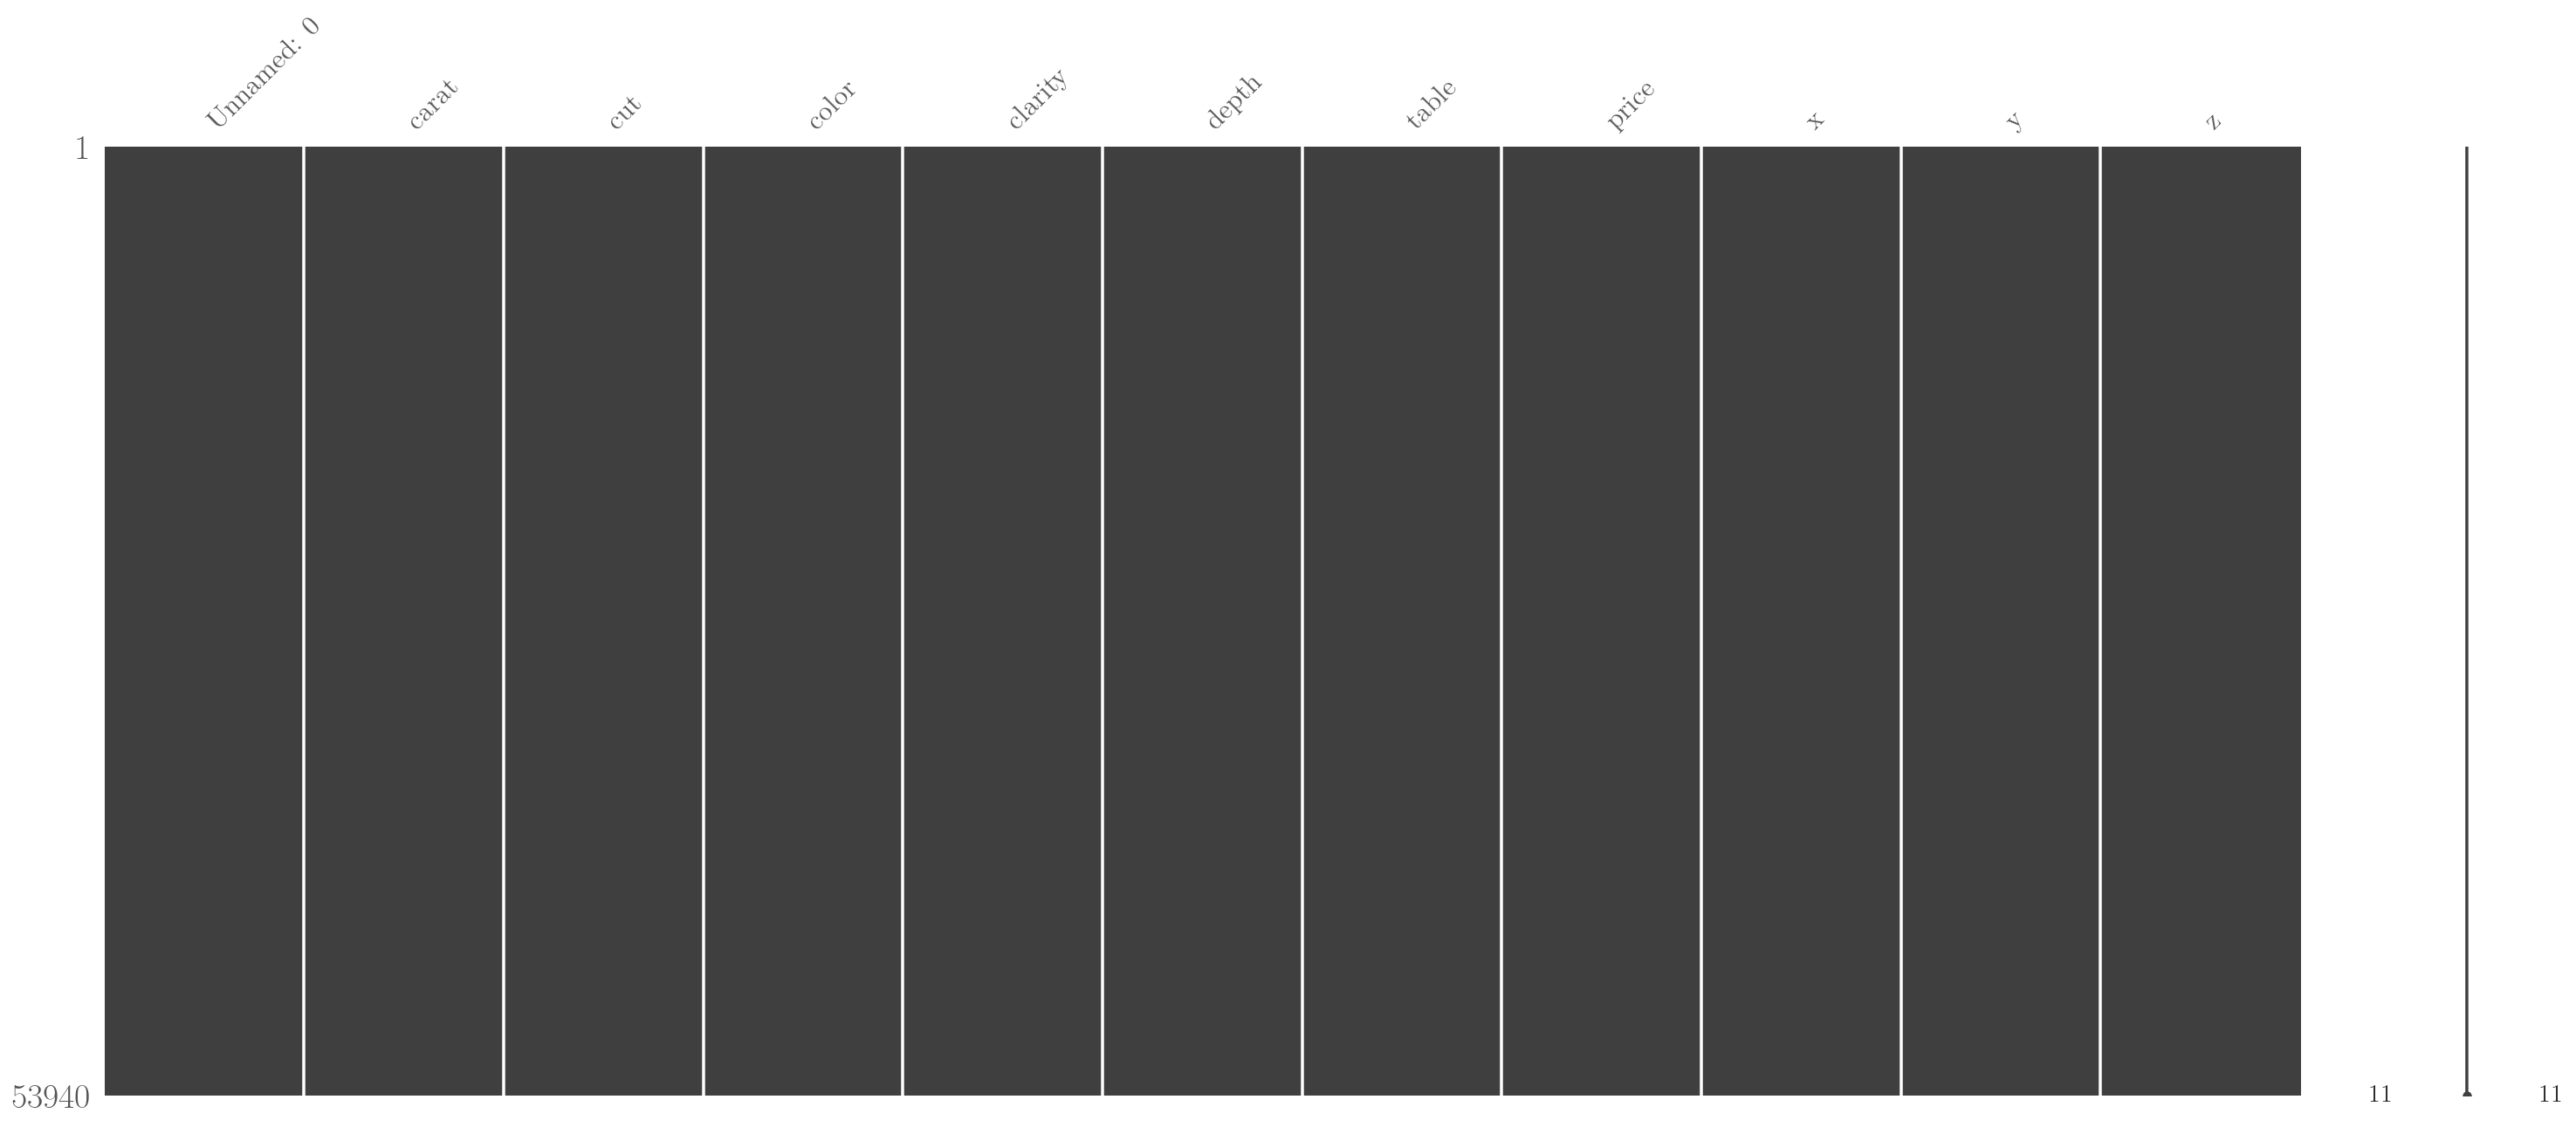

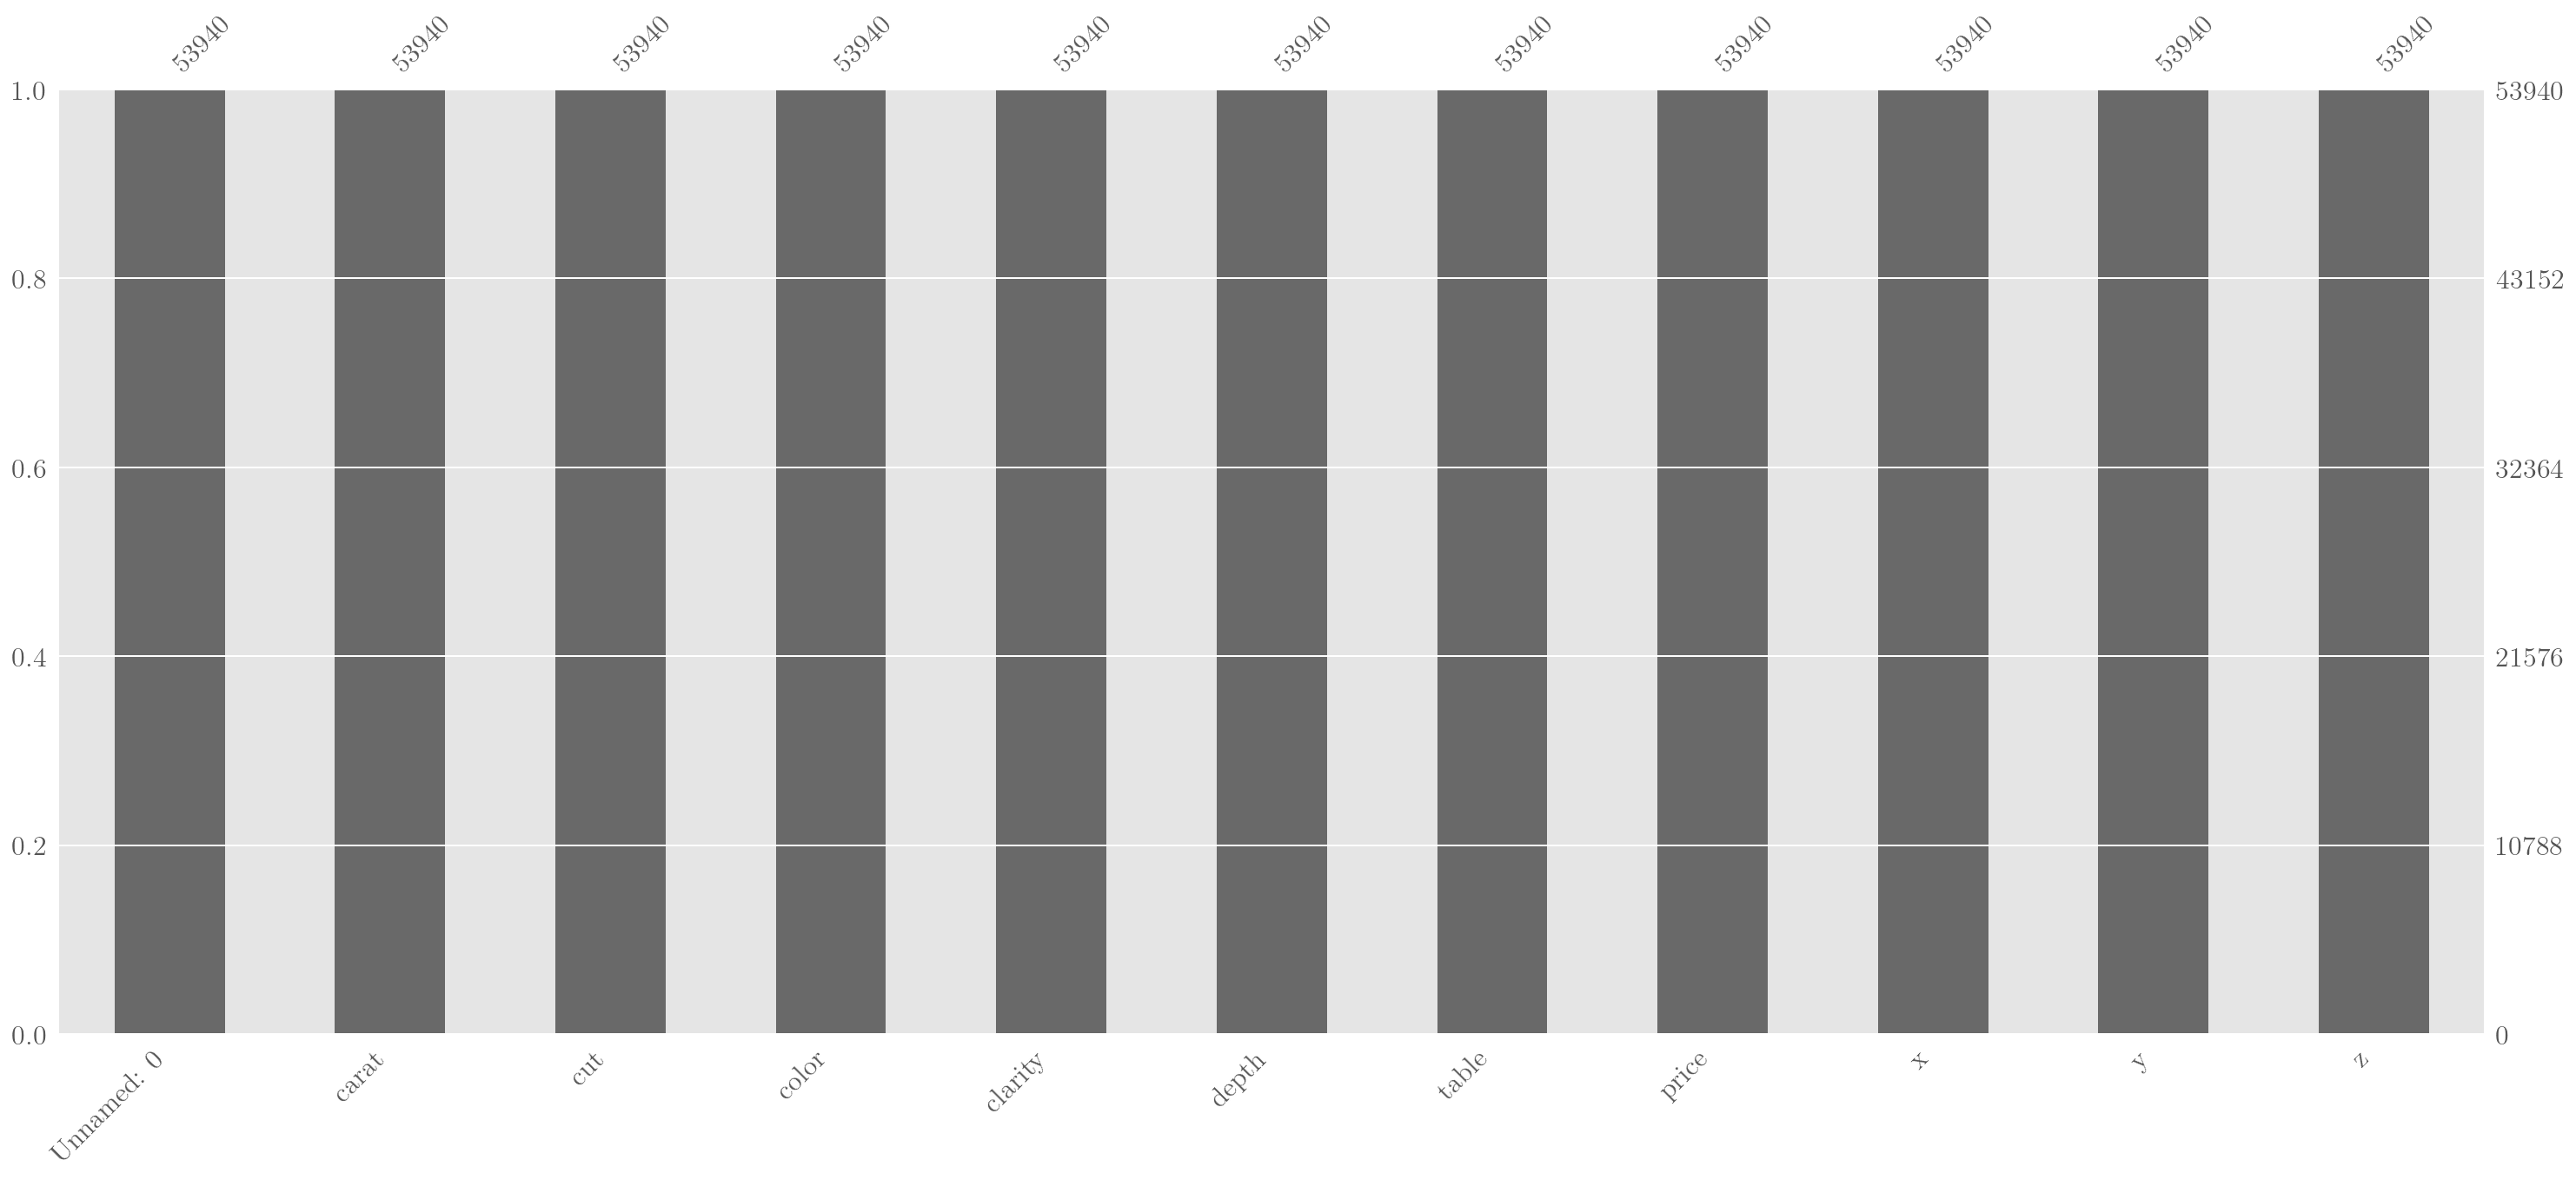

In [5]:
import missingno as msno
msno.matrix(data);
plt.show()
msno.bar(data);
plt.show()

There are no missing values in this dataset.

Lets drop the column called 'Unnamed:0' as this is not required for our analysis.

In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Lets drop any rows that contain zeros that would be diamonds of size zero.

In [8]:
data.drop(data[data['x']==0].index,inplace=True)
data.drop(data[data['y']==0].index,inplace=True)
data.drop(data[data['z']==0].index,inplace=True)


In [9]:
data.describe(include ='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53920.0,NaN,NaN,NaN,0.797698,0.473795,0.2,0.4,0.7,1.04,5.01
cut,53920,5,Ideal,21548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53920,7,G,11284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53920,8,SI1,13063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53920.0,NaN,NaN,NaN,61.749514,1.432331,43.0,61.0,61.8,62.5,79.0
table,53920.0,NaN,NaN,NaN,57.456834,2.234064,43.0,56.0,57.0,59.0,95.0
price,53920.0,NaN,NaN,NaN,3930.993231,3987.280446,326.0,949.0,2401.0,5323.25,18823.0
x,53920.0,NaN,NaN,NaN,5.731627,1.119423,3.73,4.71,5.7,6.54,10.74
y,53920.0,NaN,NaN,NaN,5.734887,1.140126,3.68,4.72,5.71,6.54,58.9
z,53920.0,NaN,NaN,NaN,3.540046,0.70253,1.07,2.91,3.53,4.04,31.8


In [10]:
data.shape

(53920, 10)

In [11]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
[21548, 13780, 12081, 4902, 1609]


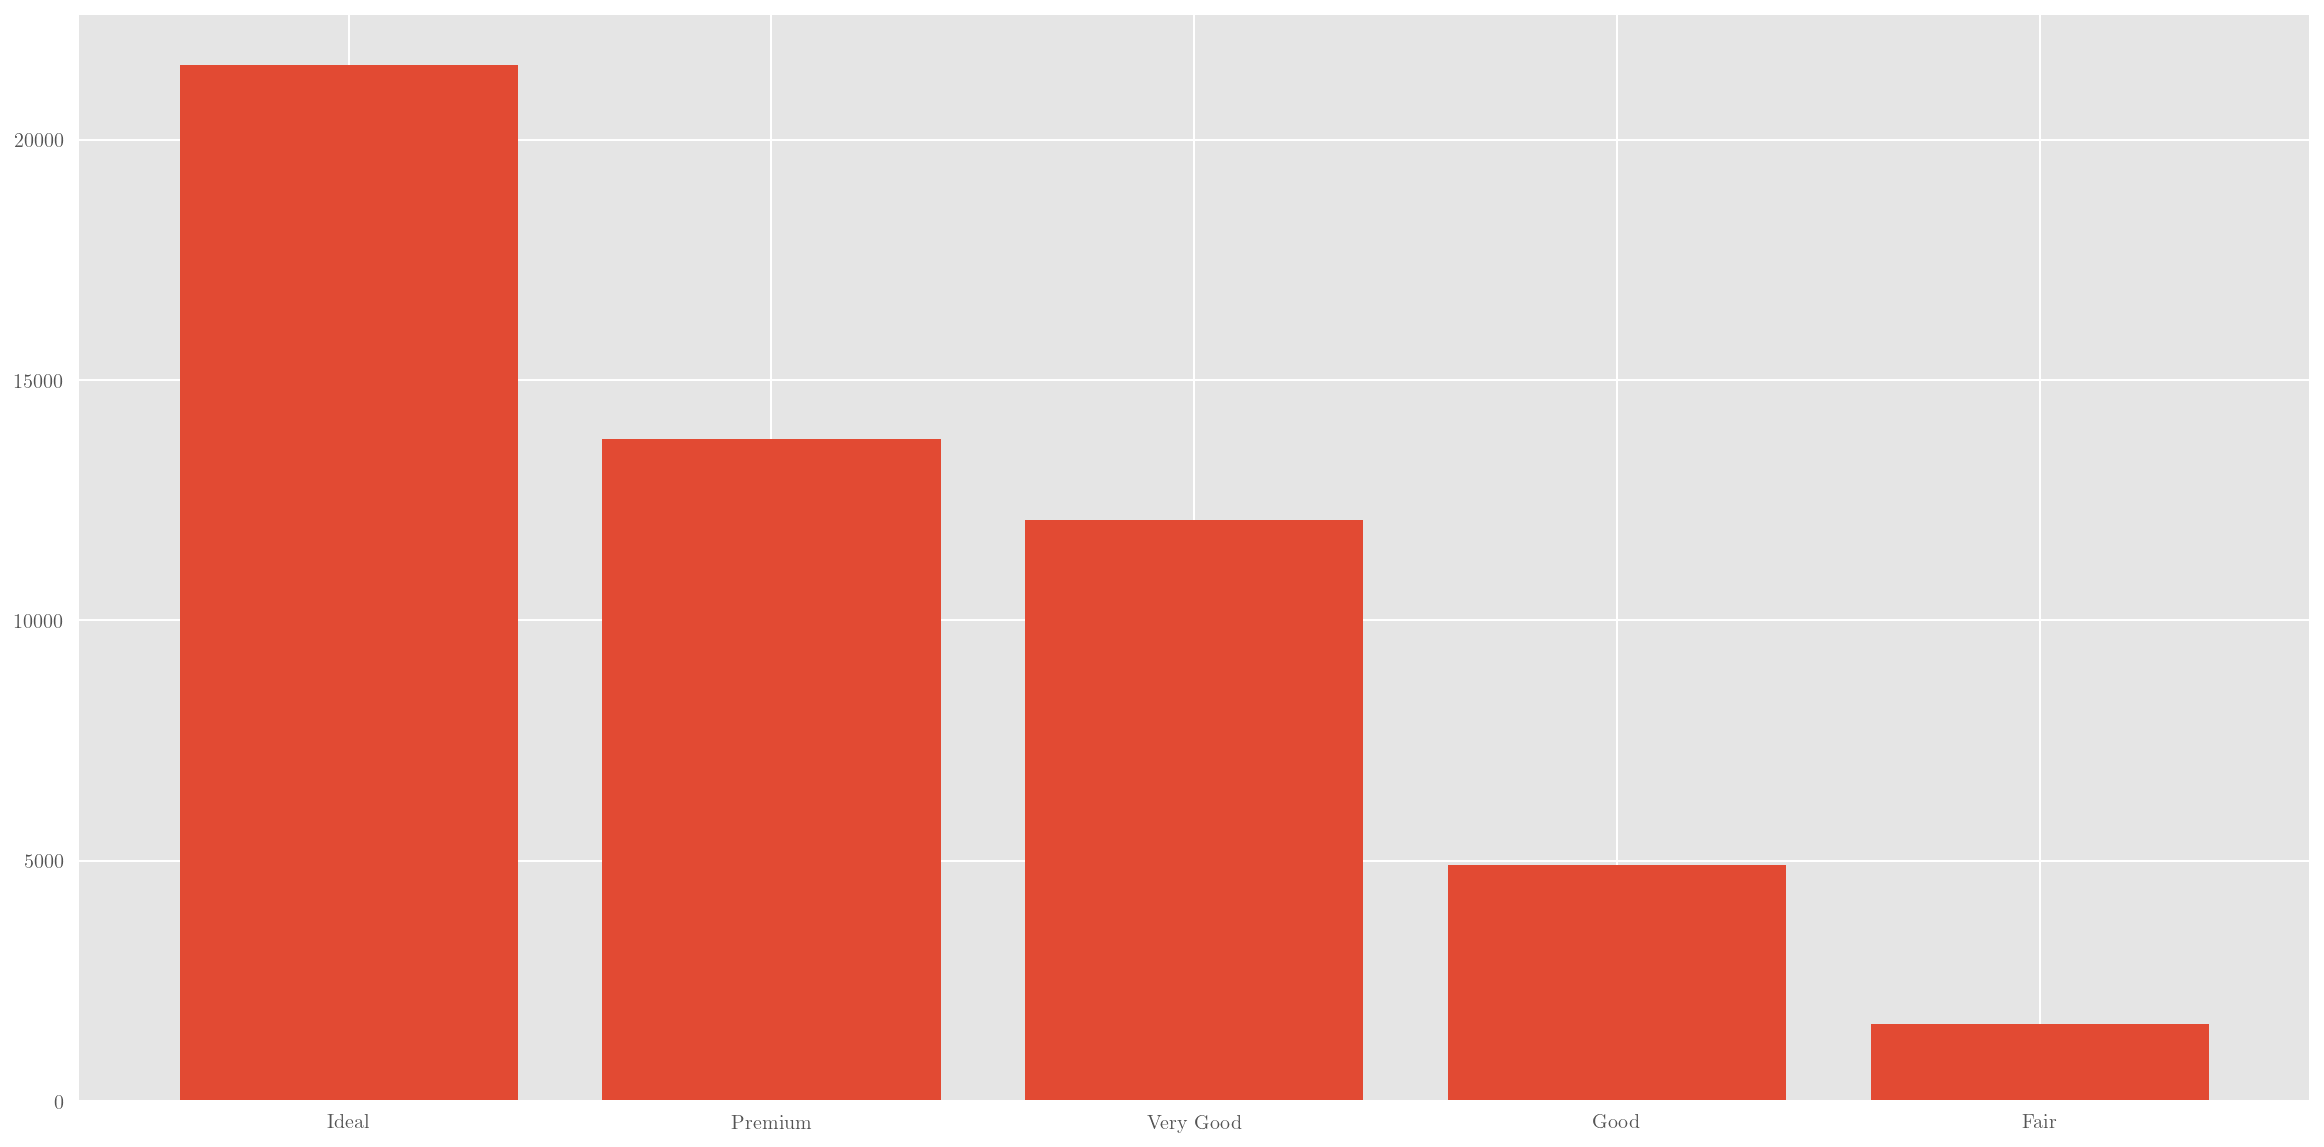

In [12]:
cutindexes = data["cut"].value_counts().index.tolist()
cutcount = data["cut"].value_counts().values.tolist()

print(cutindexes)
print(cutcount)
plt.bar(cutindexes, cutcount);
plt.show()

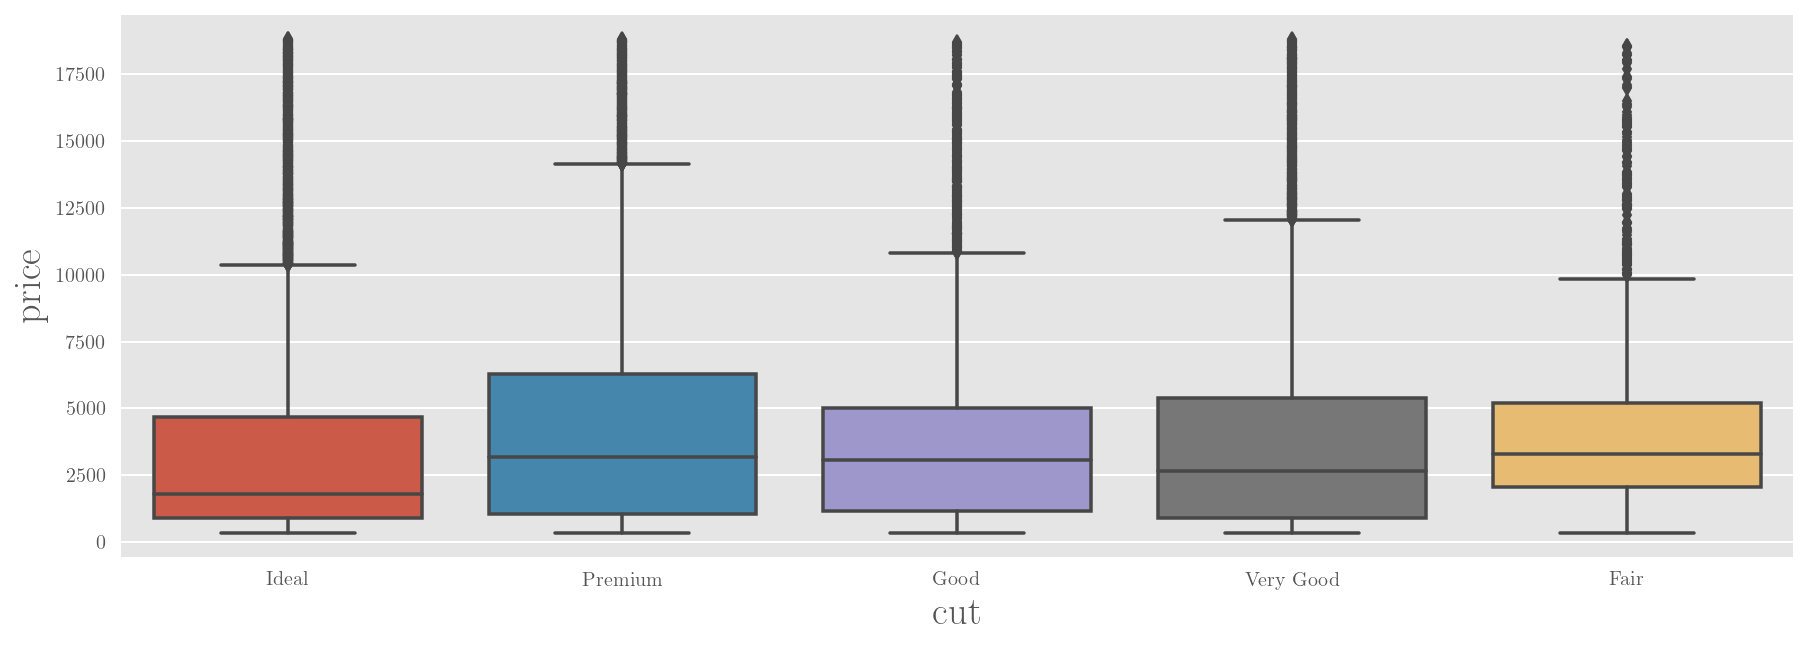

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x='cut',y='price',data=data);

Diamond cut includes 5 types of ordinal values include Fair, Good, Very Good, Premium, Ideal. The majority of the diamonds in the dataset have an Ideal cut (21548 observations) followed by Premium (13780 observations), Very good (12081 observations), Good (4902 observations) and Fair (1609 observations).

['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
[13063, 12254, 9185, 8170, 5066, 3654, 1790, 738]


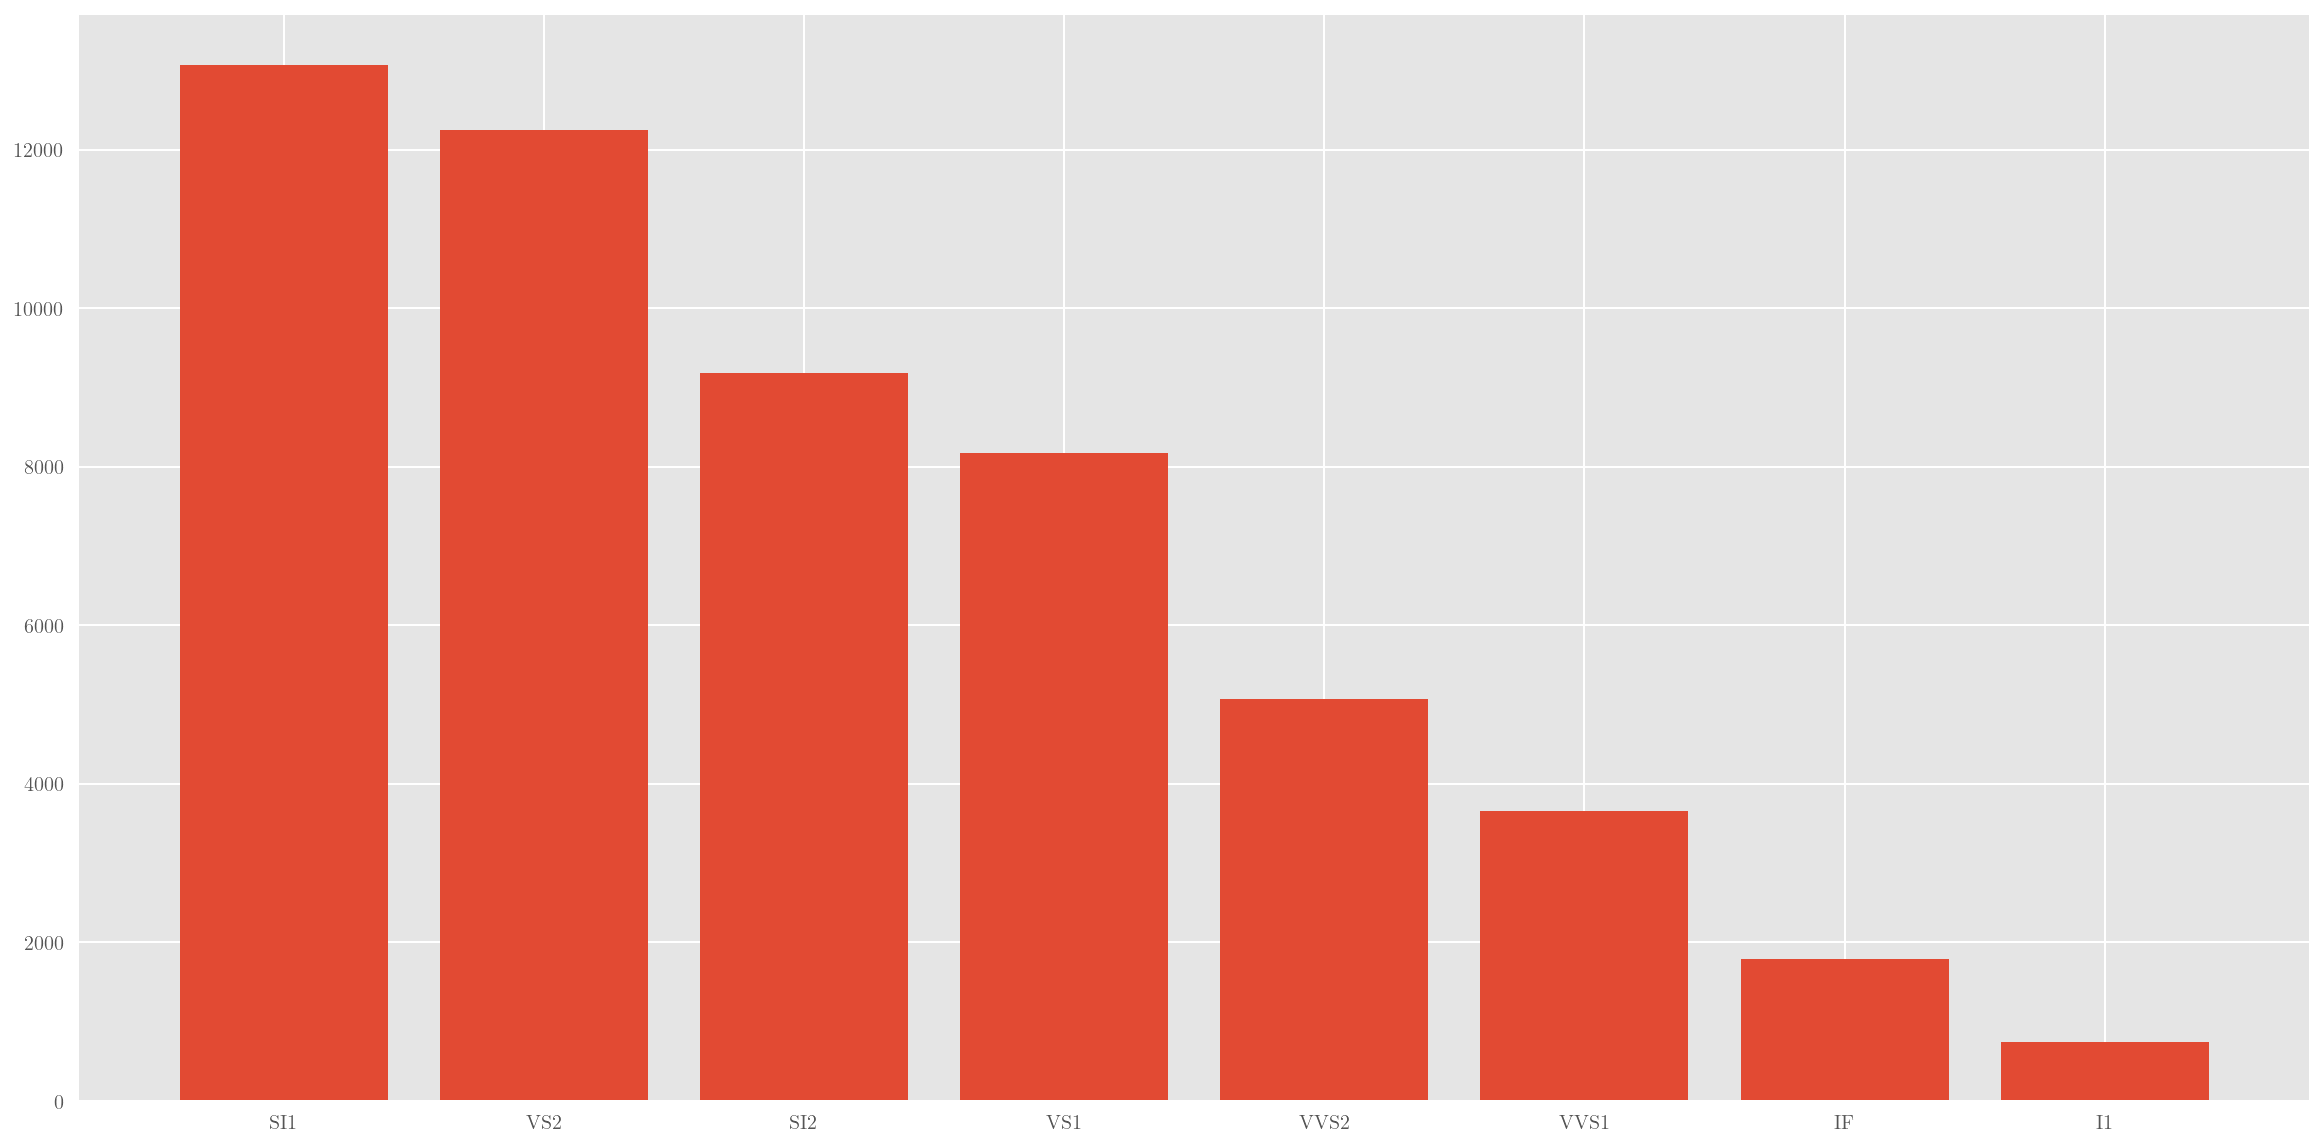

In [14]:
clarityindexes = data["clarity"].value_counts().index.tolist()
claritycount = data["clarity"].value_counts().values.tolist()

print(clarityindexes)
print(claritycount)
plt.bar(clarityindexes, claritycount);
plt.show()

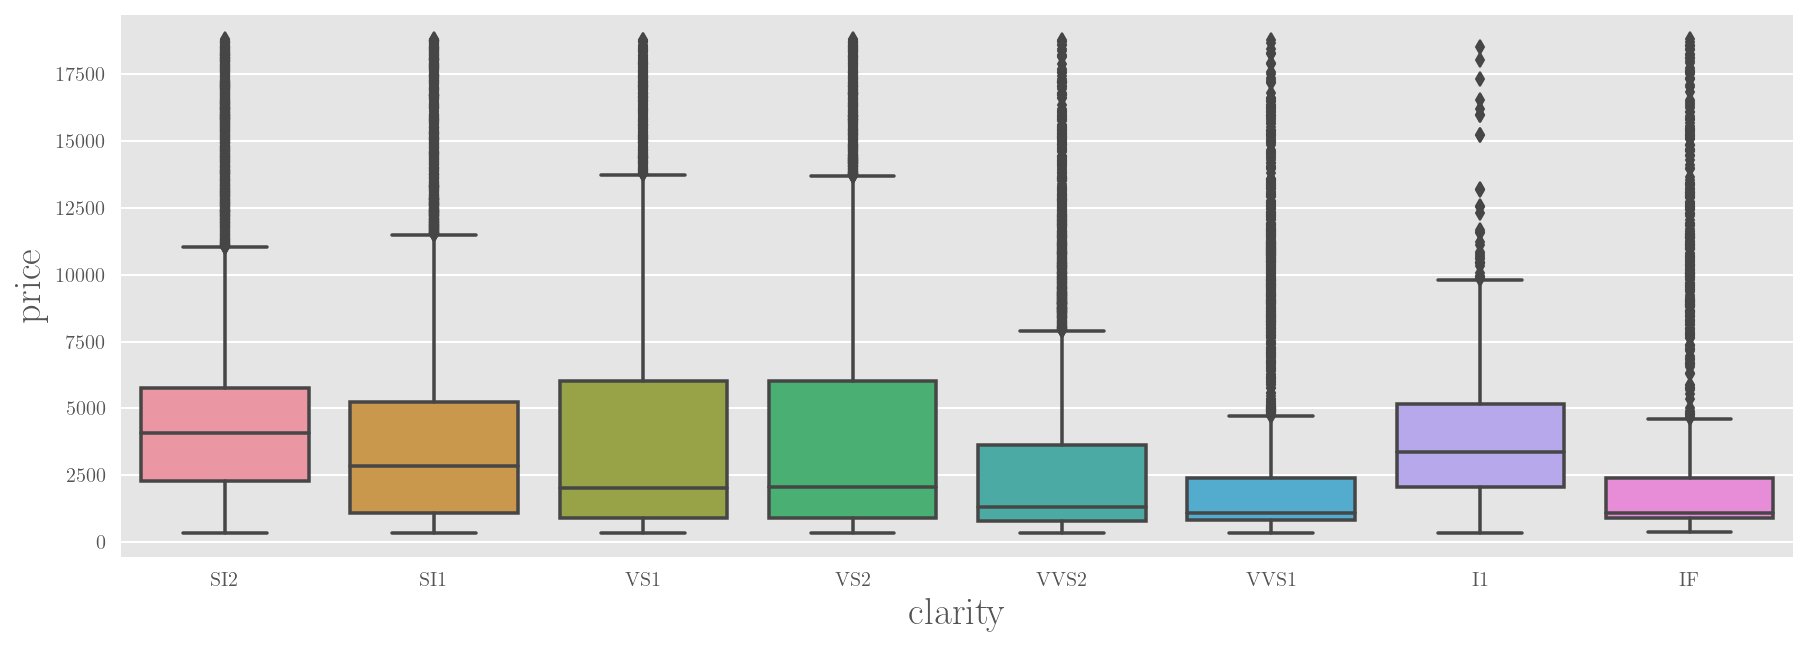

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x='clarity',y='price',data=data);

['G', 'E', 'F', 'H', 'D', 'I', 'J']
[11284, 9797, 9538, 8298, 6774, 5421, 2808]


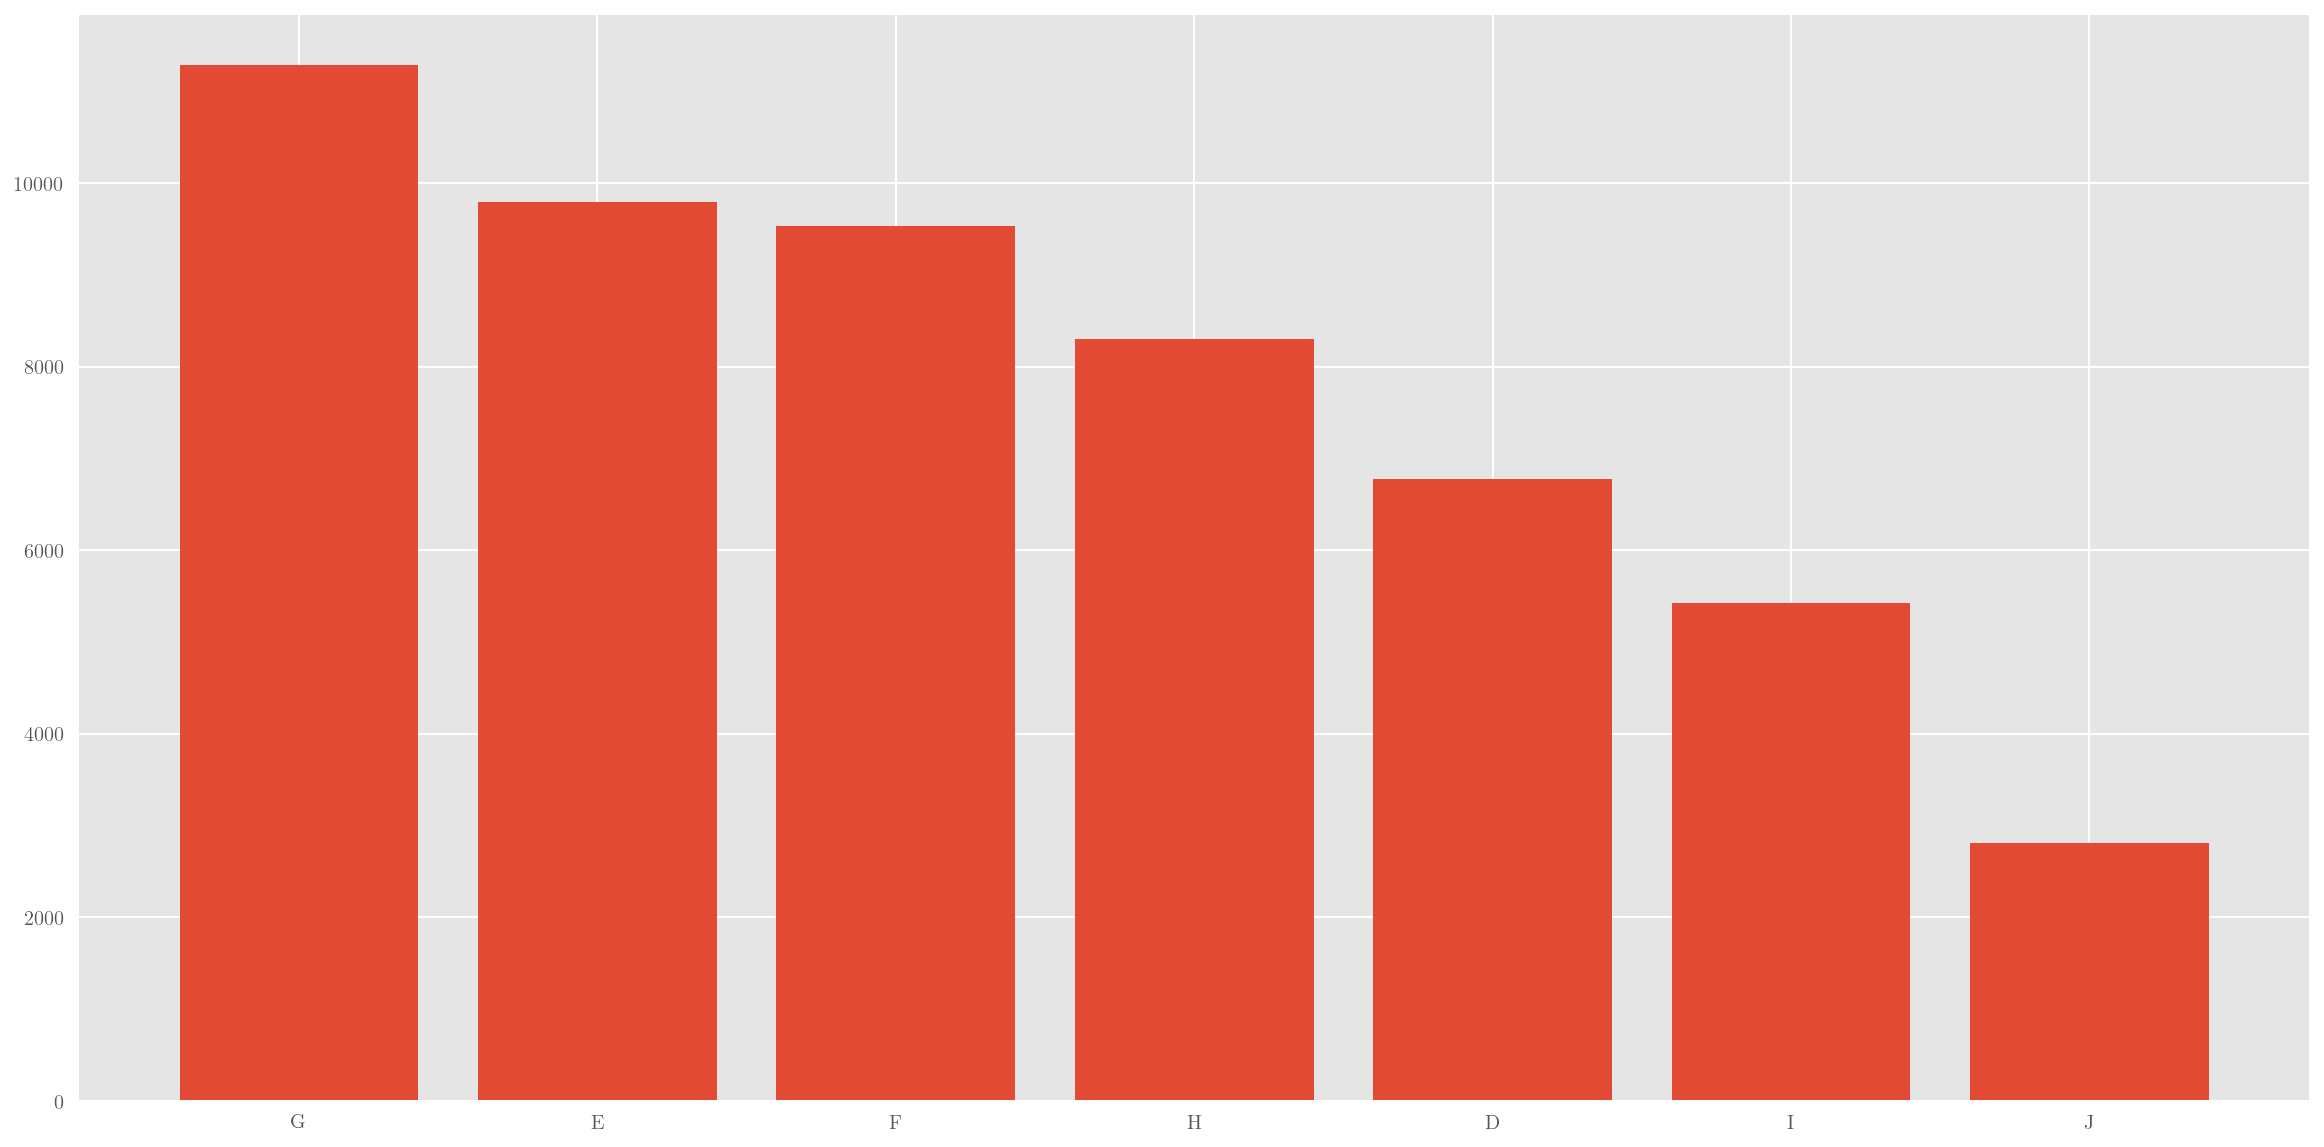

In [16]:
colorindexes = data["color"].value_counts().index.tolist()
colorcount = data["color"].value_counts().values.tolist()

print(colorindexes)
print(colorcount)
plt.bar(colorindexes, colorcount);
plt.show()

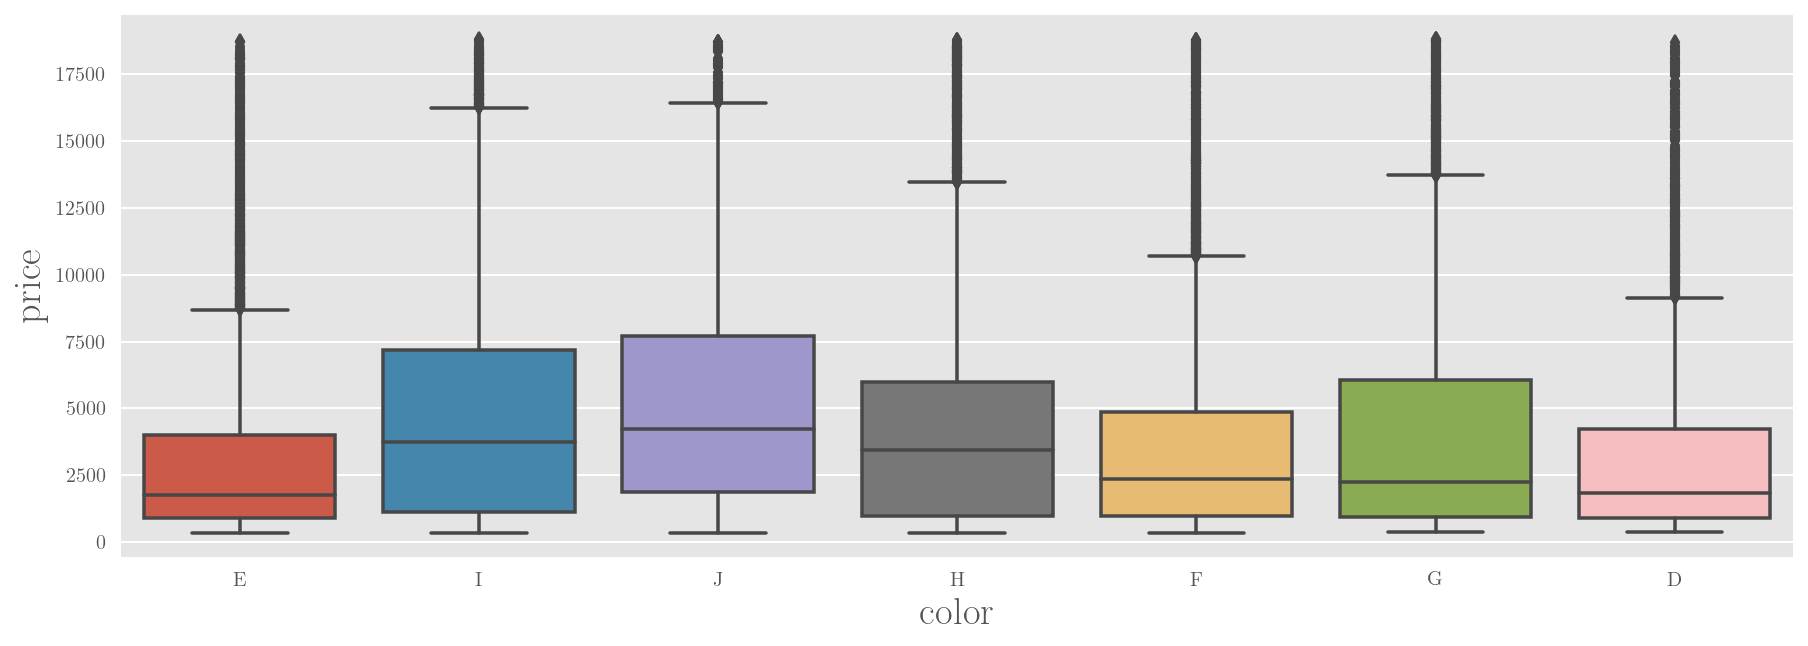

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x='color',y='price',data=data);

These Box plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.

In this data, all three categorical predictors looks correlated with the target variable.
(There are a lot of outliers that is diamonds that cost a lot which we need to handle which will be addressed in the next iteration of the notebook.)
#grammarly software

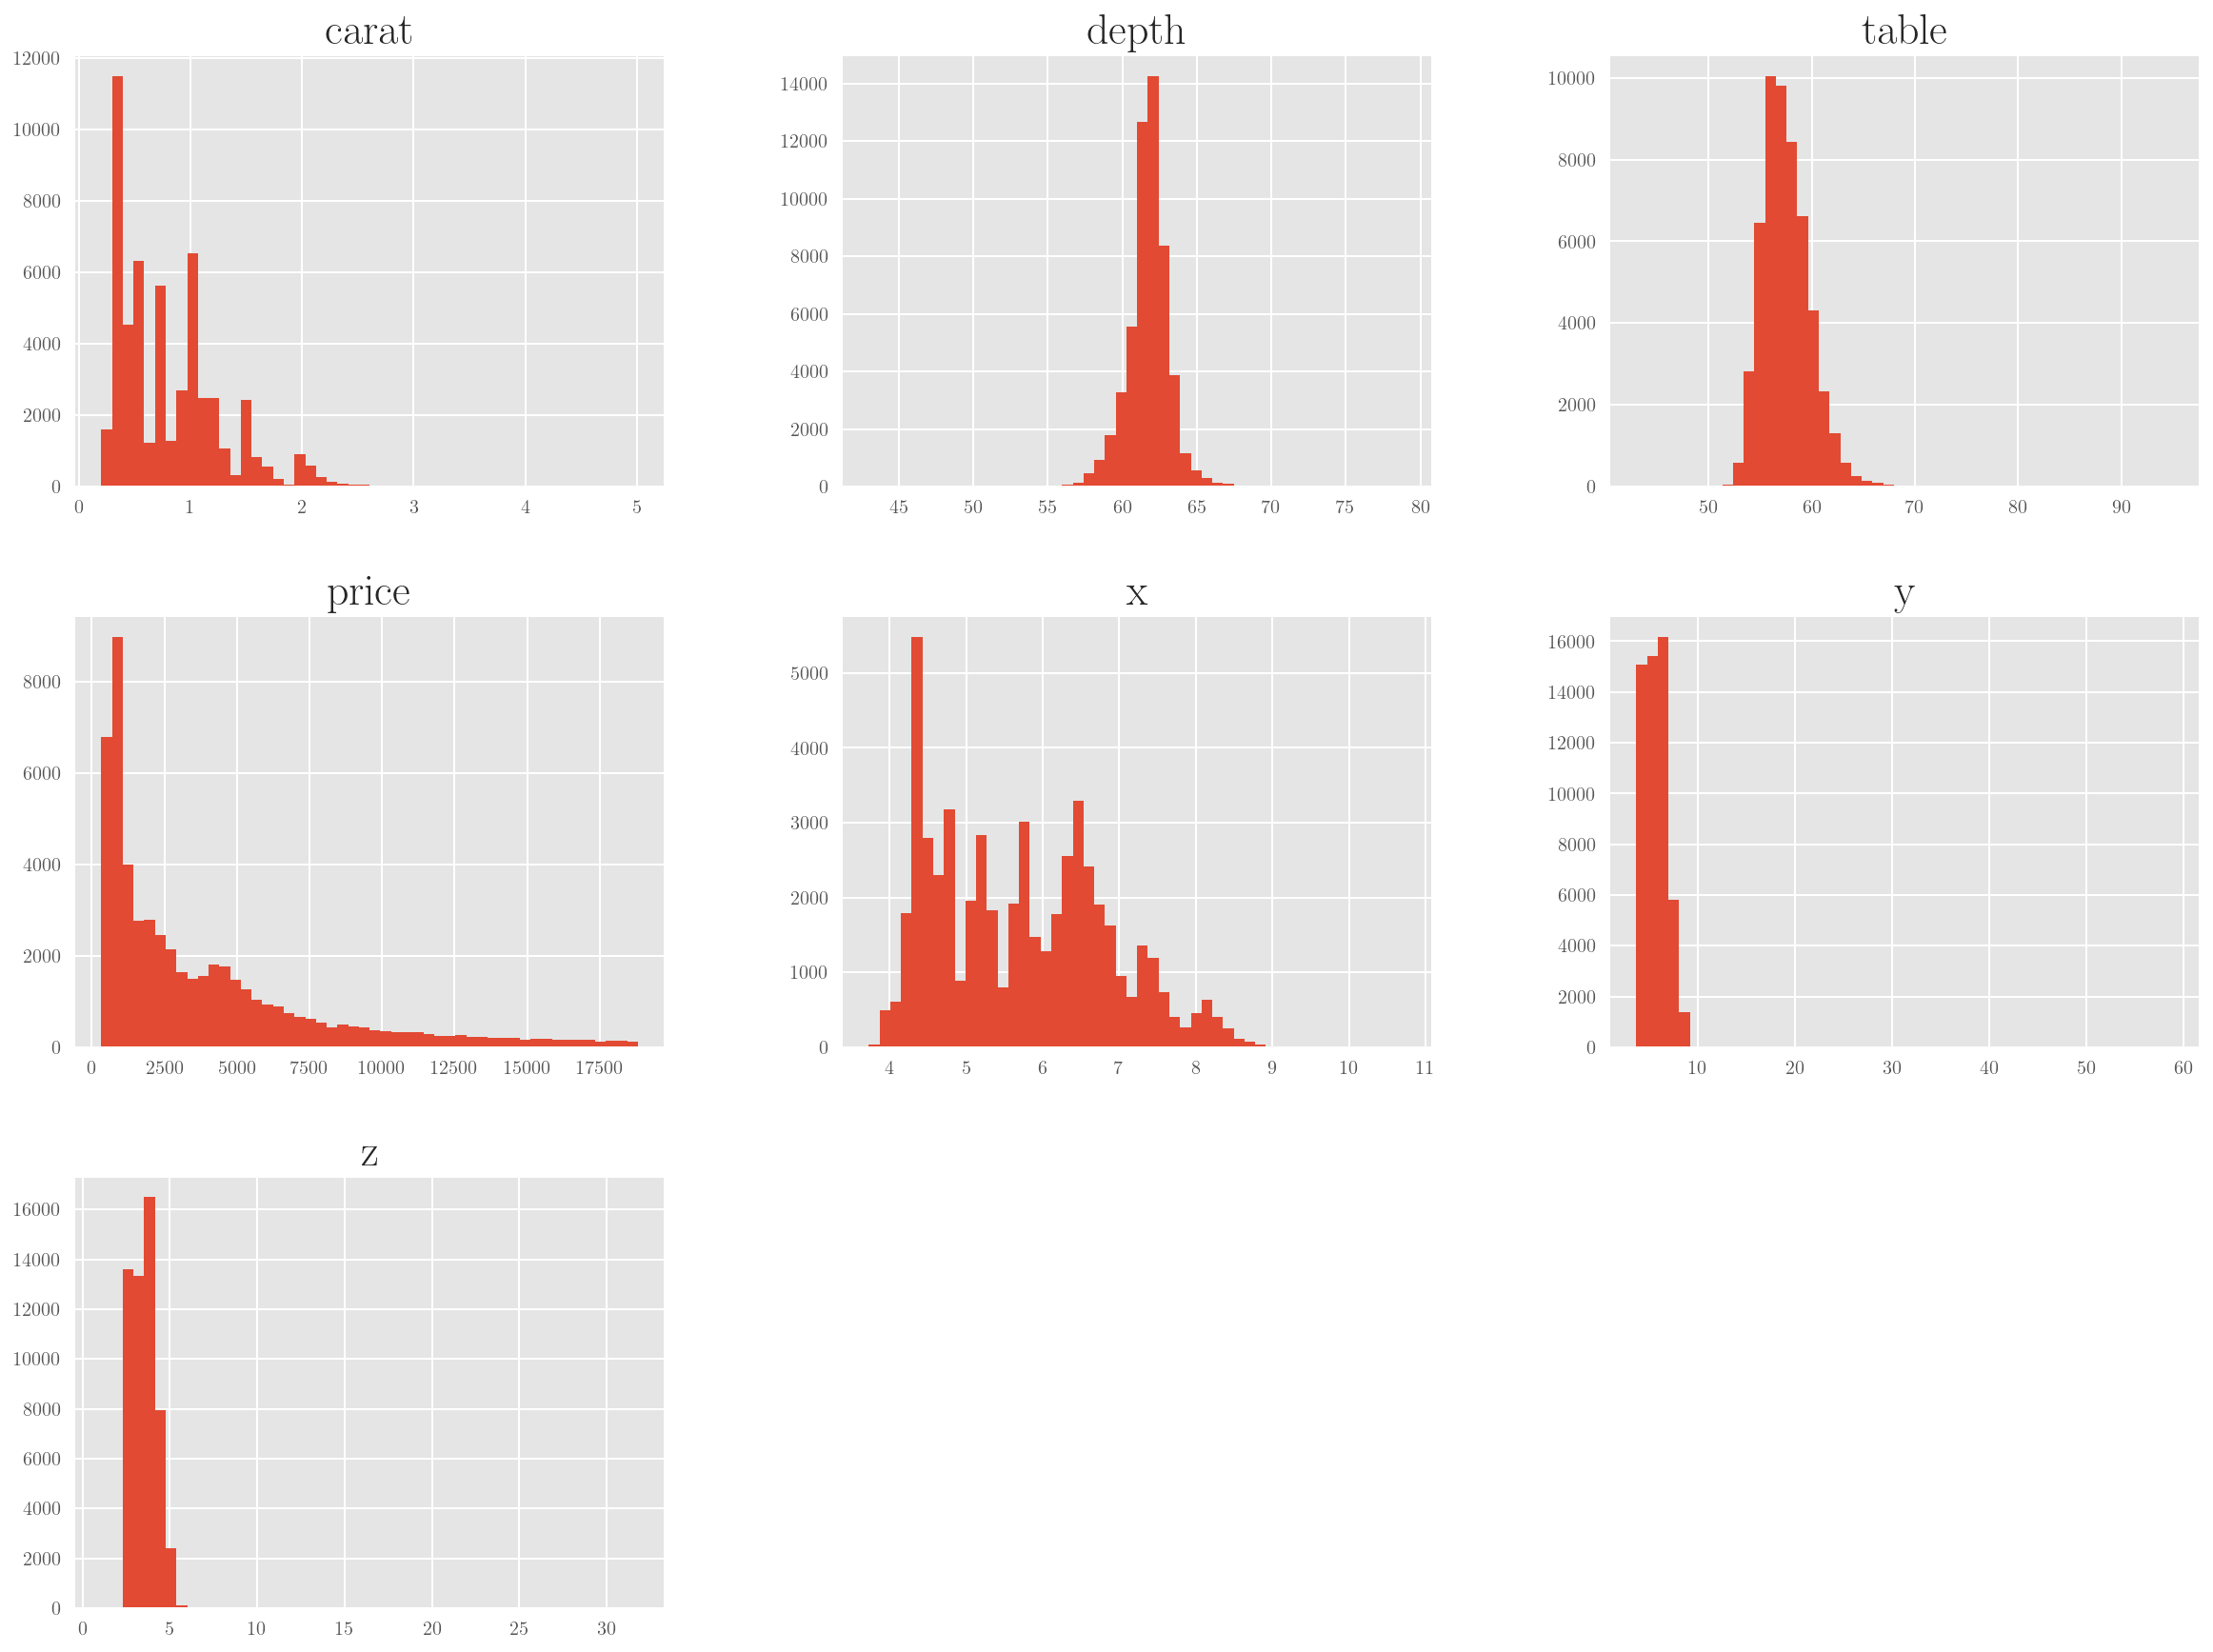

In [18]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15));
plt.show()

In [19]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

data['cut'] = label_encoder.fit_transform(data['cut'])
data['color'] = label_encoder.fit_transform(data['color'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [20]:
# Let us build a base linear regression model using all the variables
y = data[['price']]
X=data.drop(['price'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=2)

In [21]:
# Base simple linear regression
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
labels = linear_model.predict(X_test)

# Check how good are the predictions?
mse         = mean_squared_error(y_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
print(rf'Model coefficients are: {linear_model.coef_}')

Mean squared error: 1762945.39
Coefficient of Determination (R^2):0.8871
Model coefficients are: [[11216.8144194     70.81466777  -266.81304029   286.99898506
   -151.62342541   -91.93289726 -1239.18855295    47.6005681
    -76.34615225]]


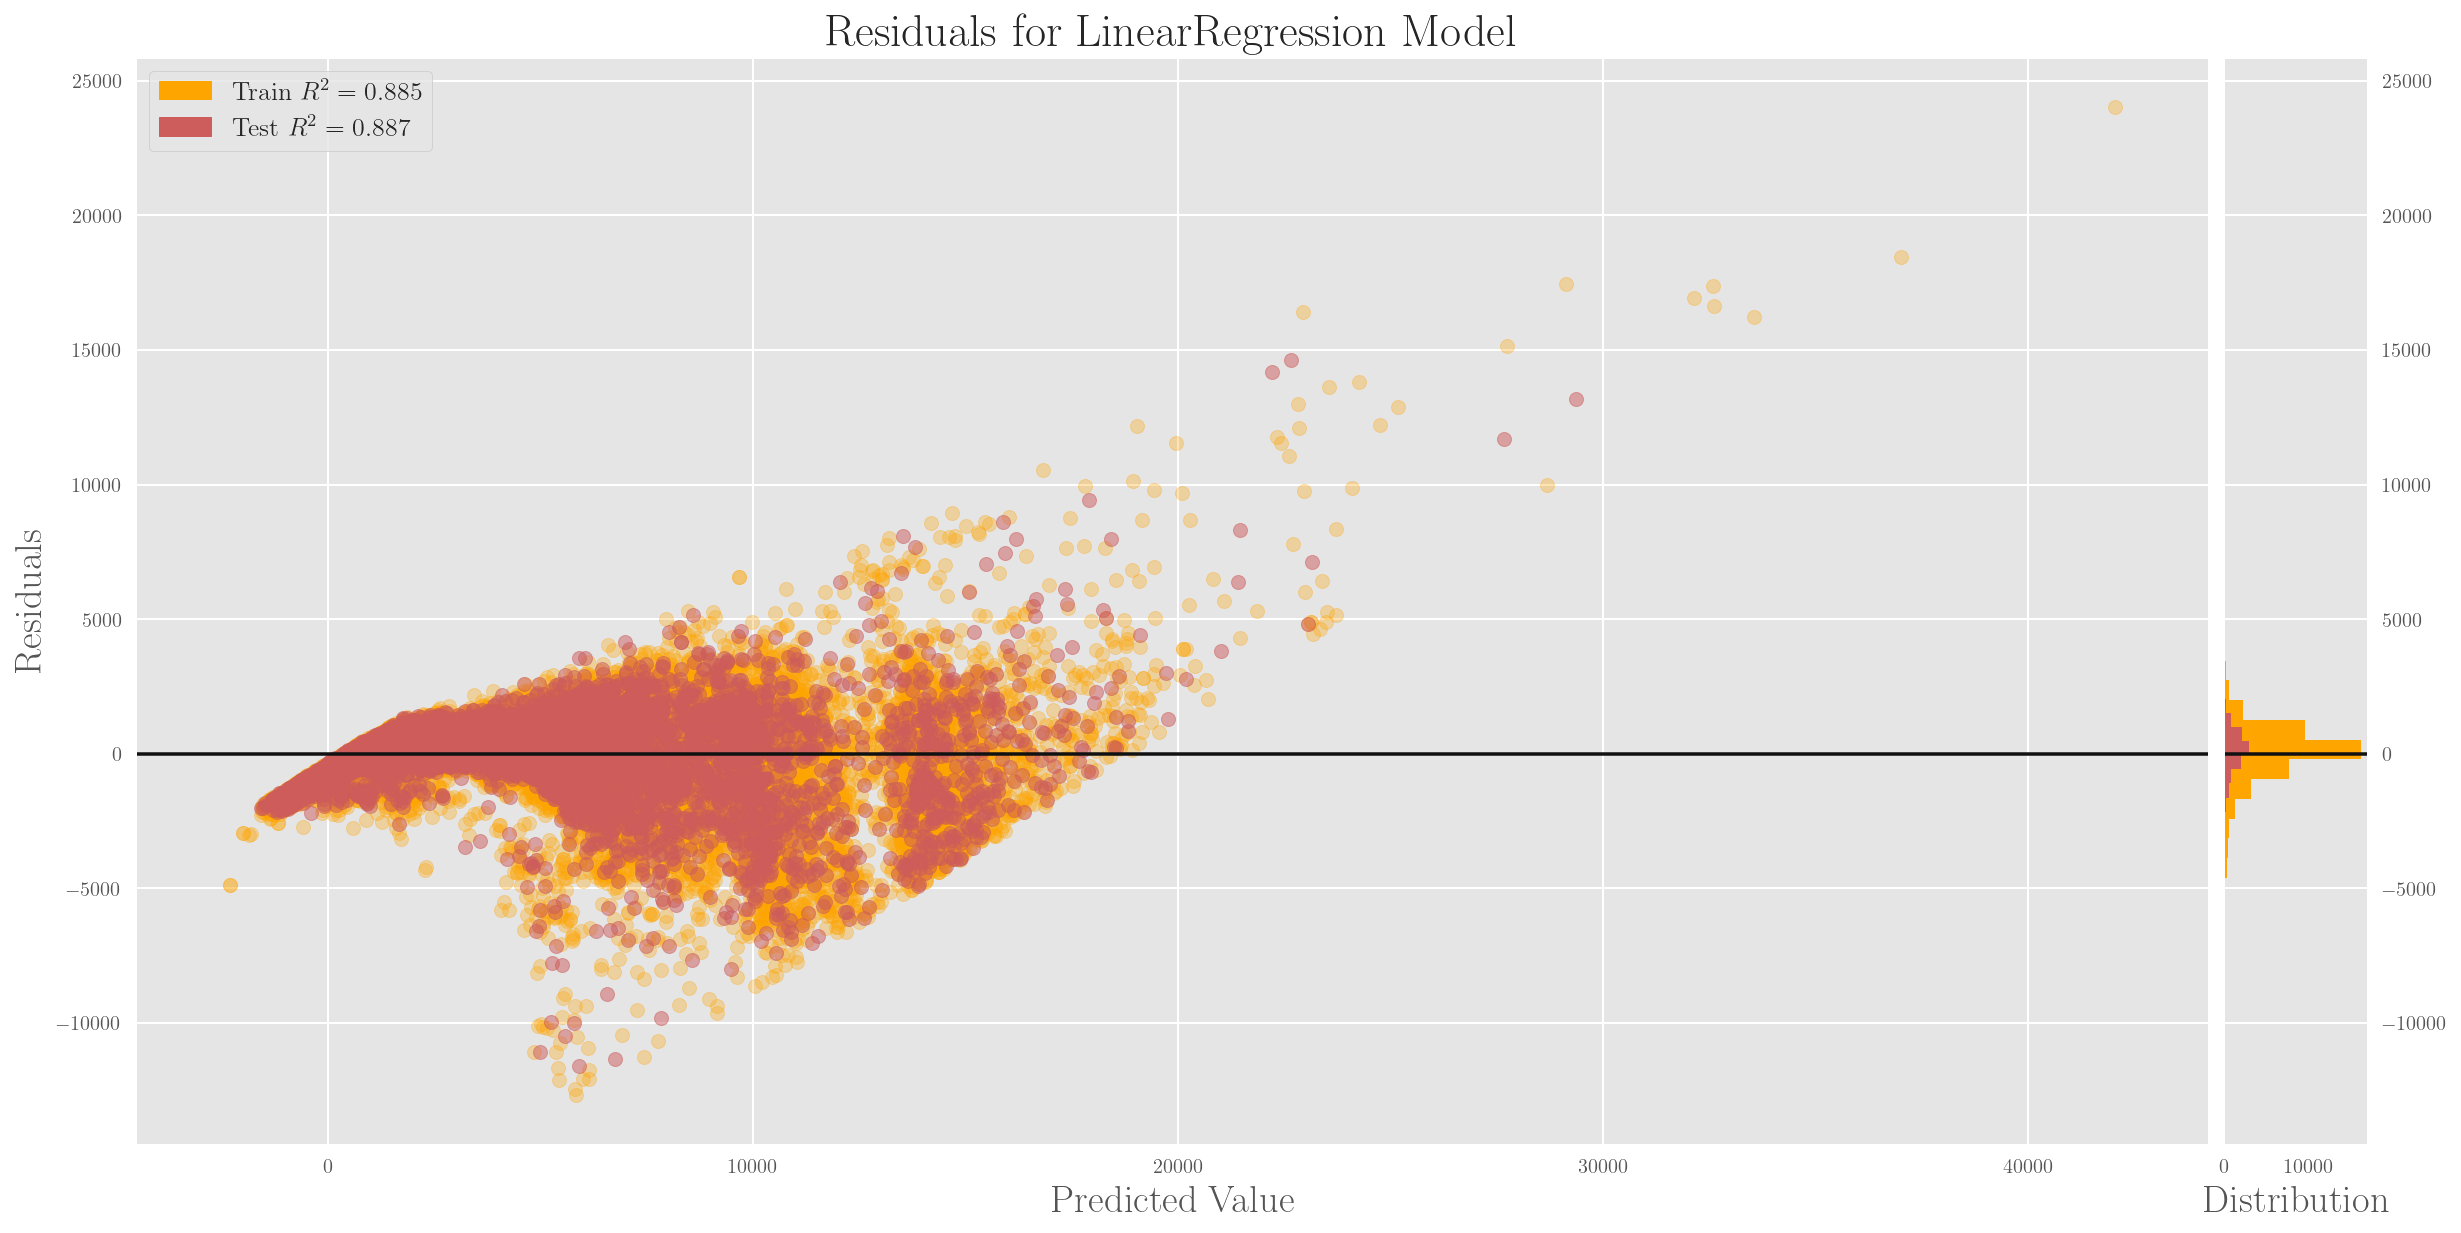

In [22]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(linear_model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

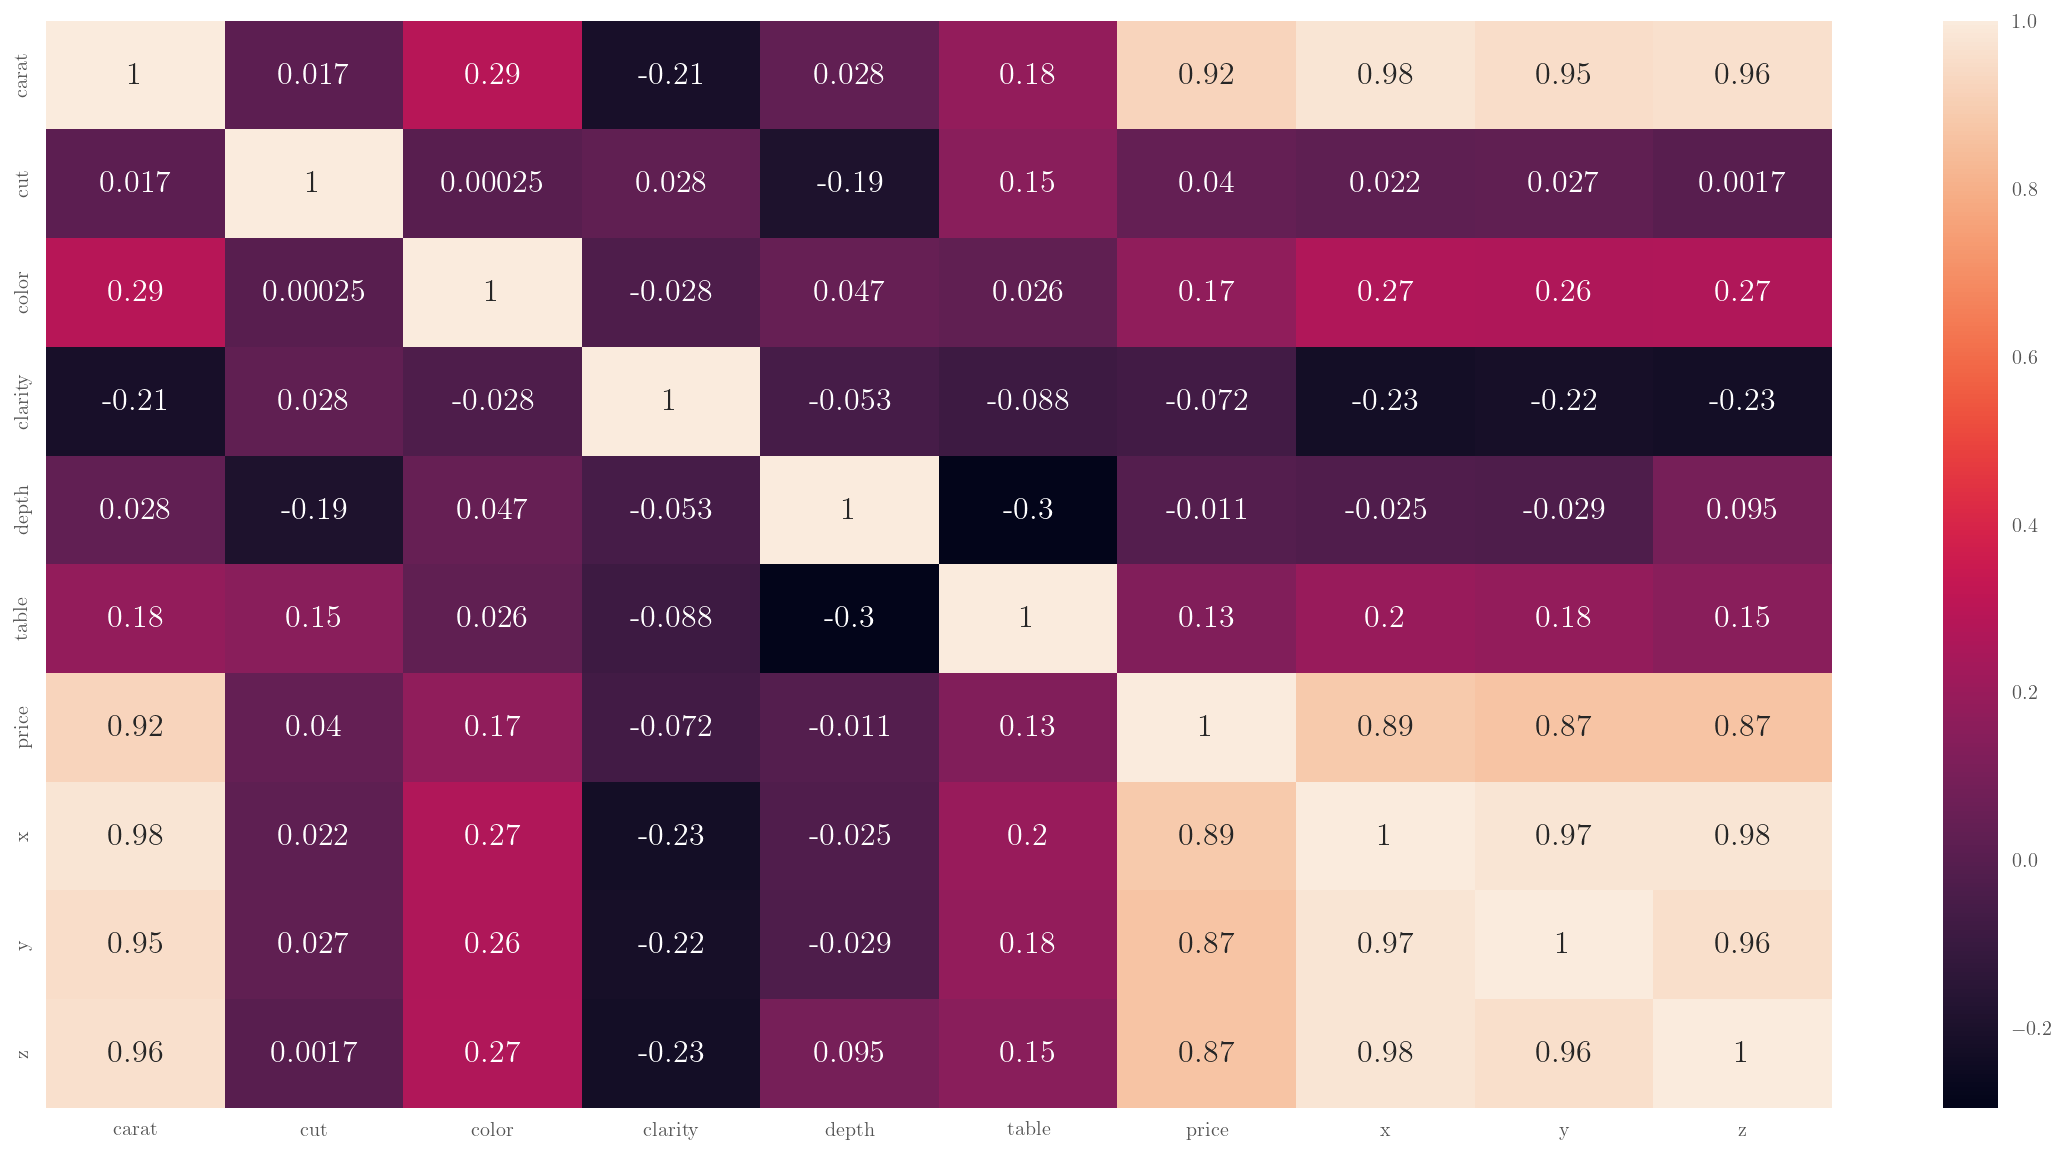

In [23]:
# Lets check for correlation of variable 
sns.heatmap(data.corr(),annot=True);

The first thing to notice on the graph is that the lighter the color, the higher the correlation between the two variables. The diagonal band from top to left up to bottom shows that, for example, the carat is 100% correlated with the carat. 

The x, y, and z variables are quite correlated with each other, indicating that when the diamonds in our database increase in one dimension, they also increase in the other two dimensions.

Since carat,x, y z  have high correlation we can use any one variable for our analysis as all these columns have the same impact on the target we can choose any one.Also linear regression doesnot handle highly corelated predictors as they can heavily influence the model. Even carat and price have a strong corellation meaning if carat increases price also increases.

There is also a noticeable negative correlation of 30% between the depth of a diamond and its table value.

We can observe Price which is our target varaiable is right skewed.So we need to normalize the data. do quantile and power transformation. do without transformations first then use transformations.... create baseline with all the variables linear model

In [24]:
data=data.drop(['carat','z','y'],axis=1) # have to keep x has it has the highest corr to avoid multi collinearity we choose any one column

Before proceeding to build the model, we convert the categorical data to numerical data because the .

In [25]:
y = data[['price']]

In [26]:
X=data.drop(['price'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=2)

In [28]:

# using Robustscaler as we have outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



We can observe that even after standard normalization the data is still skewed. 
The fact that the features are still skewed confirms that standardization does not work on them.
To implement non-linear transformations, Sklearn offers a PowerTransformer class (uses logarithmic functions under the hood) that helps minimize skewness and map any distribution to a normal one as close as possible.



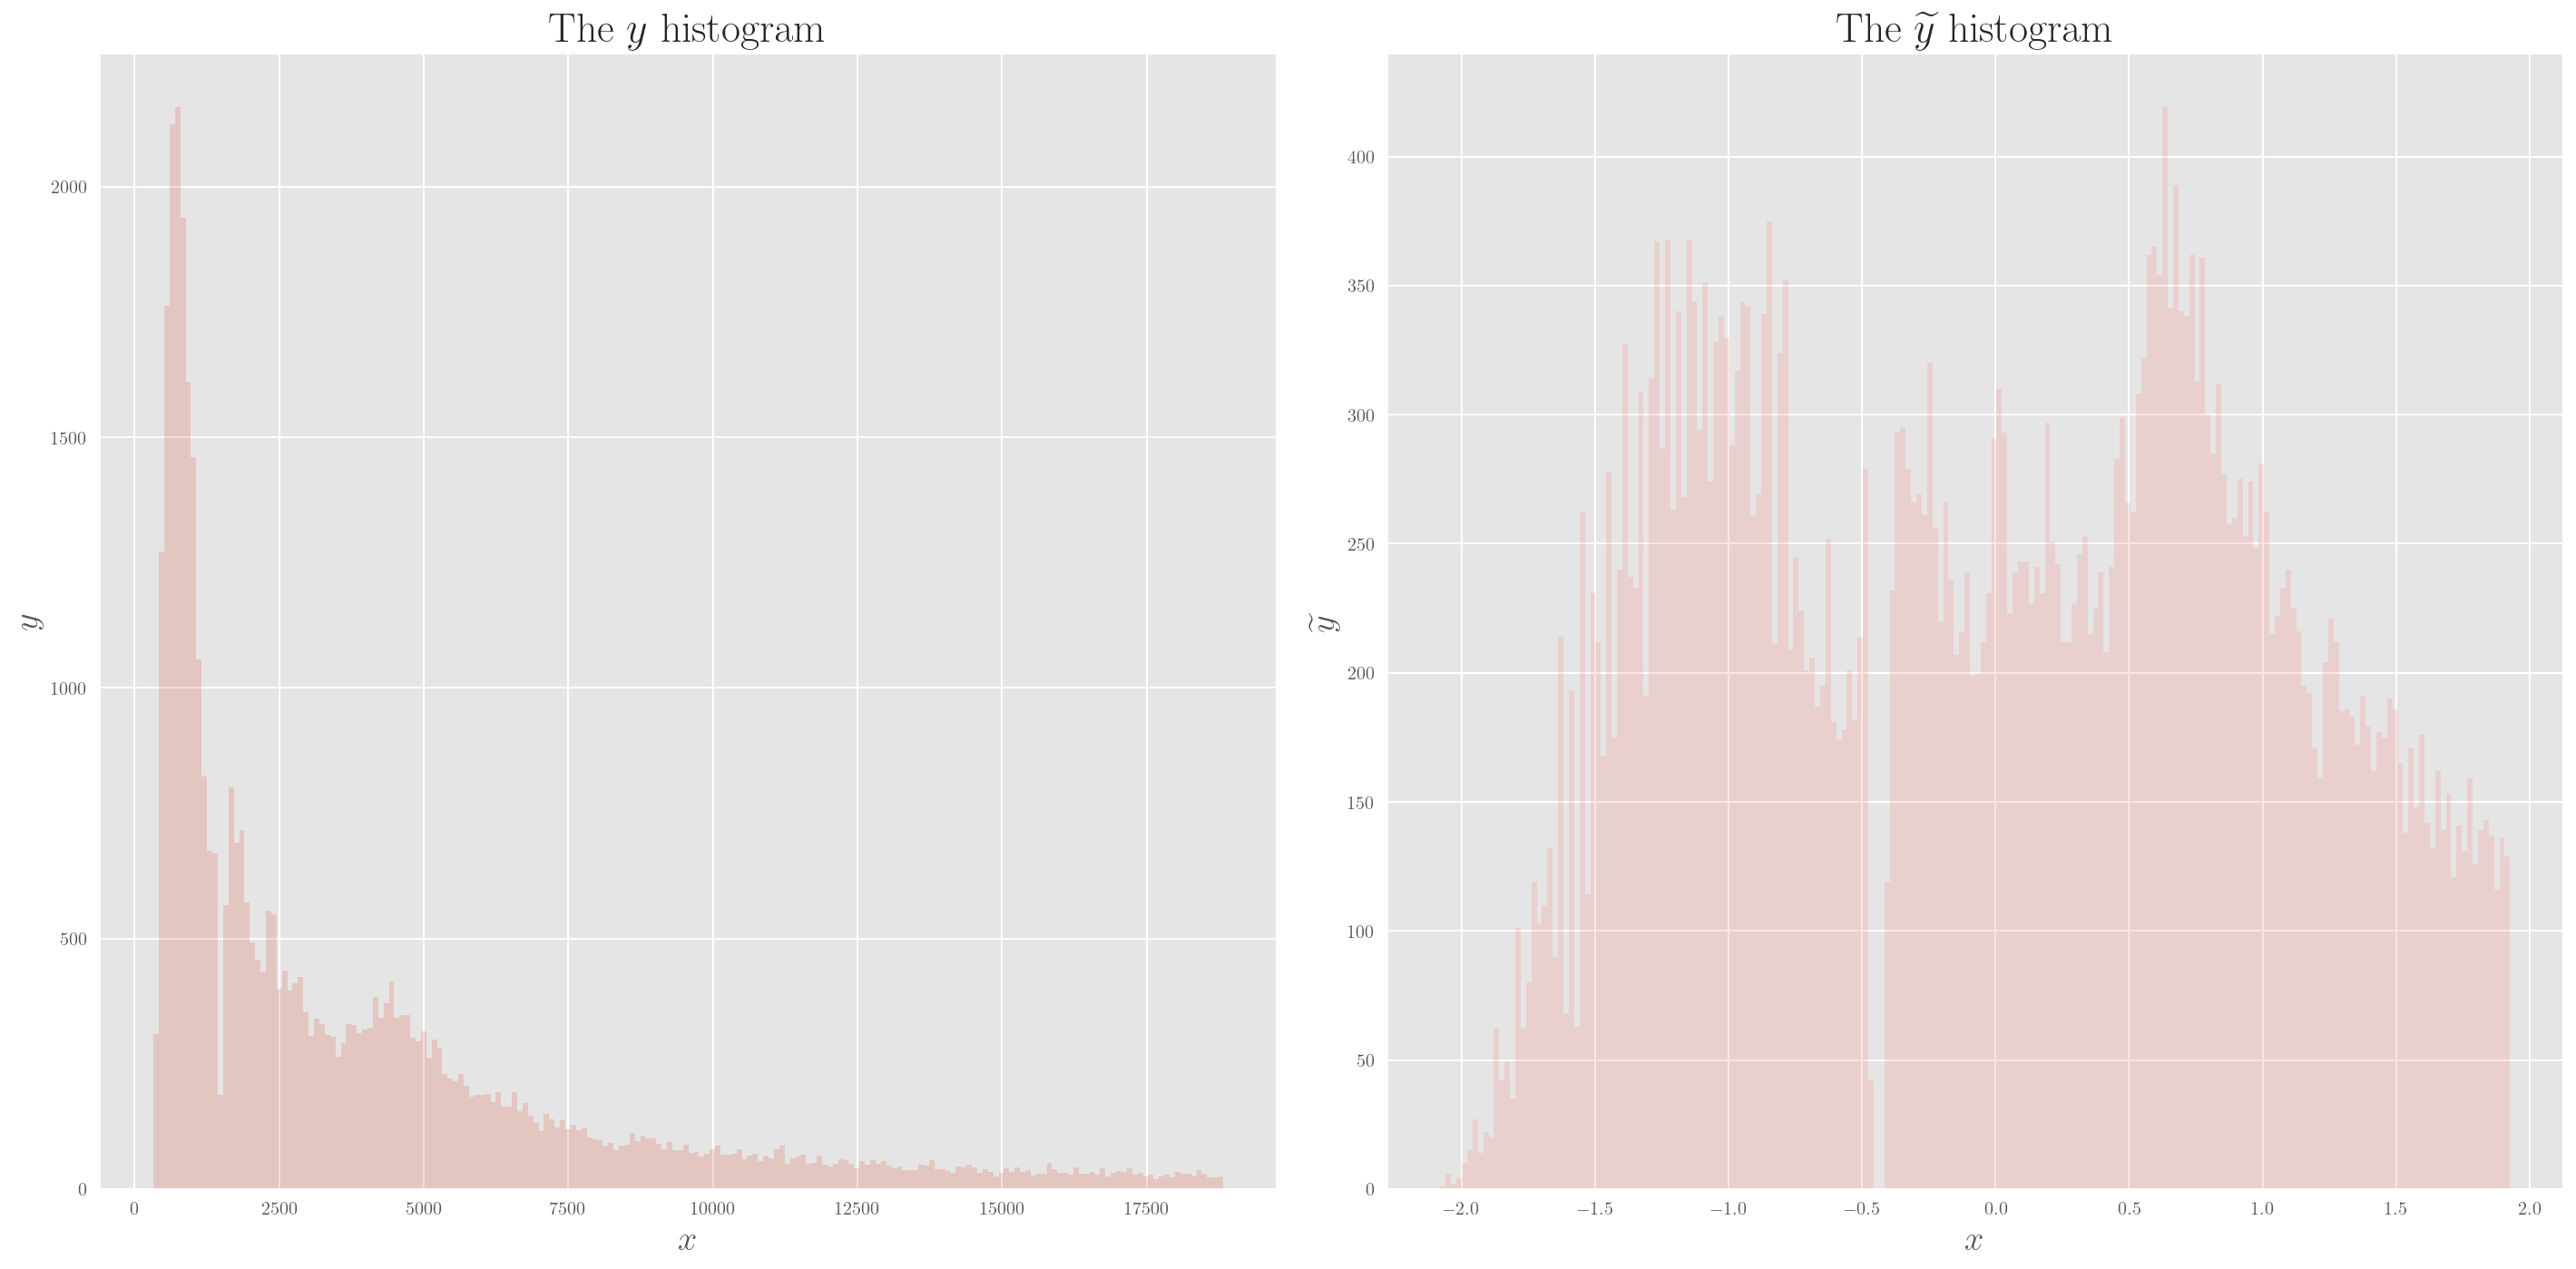

In [29]:

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
#yt = y_train.values.reshape(-1,1)
transform_y_train = power.fit_transform(y_train)


fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(y_train, bins=200, alpha=0.2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.title.set_text(r'The $y$ histogram')

ax2.hist(transform_y_train,bins=200, alpha=0.2, color='salmon')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\widetilde{y}$');
ax2.title.set_text(r'The $\widetilde{y}$ histogram')
fig.tight_layout()


Building the Linear Regression model after addressing multicolinearity 

In [30]:
# Simple linear regression
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
labels = linear_model.predict(X_test)

# Check how good are the predictions?
mse         = mean_squared_error(y_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
print(rf'Model coefficients are: {linear_model.coef_}')

Mean squared error: 2928630.80
Coefficient of Determination (R^2):0.8125
Model coefficients are: [[  97.54262133 -565.96655714  947.74677278   69.65052967 -225.97682054
  6189.44055514]]


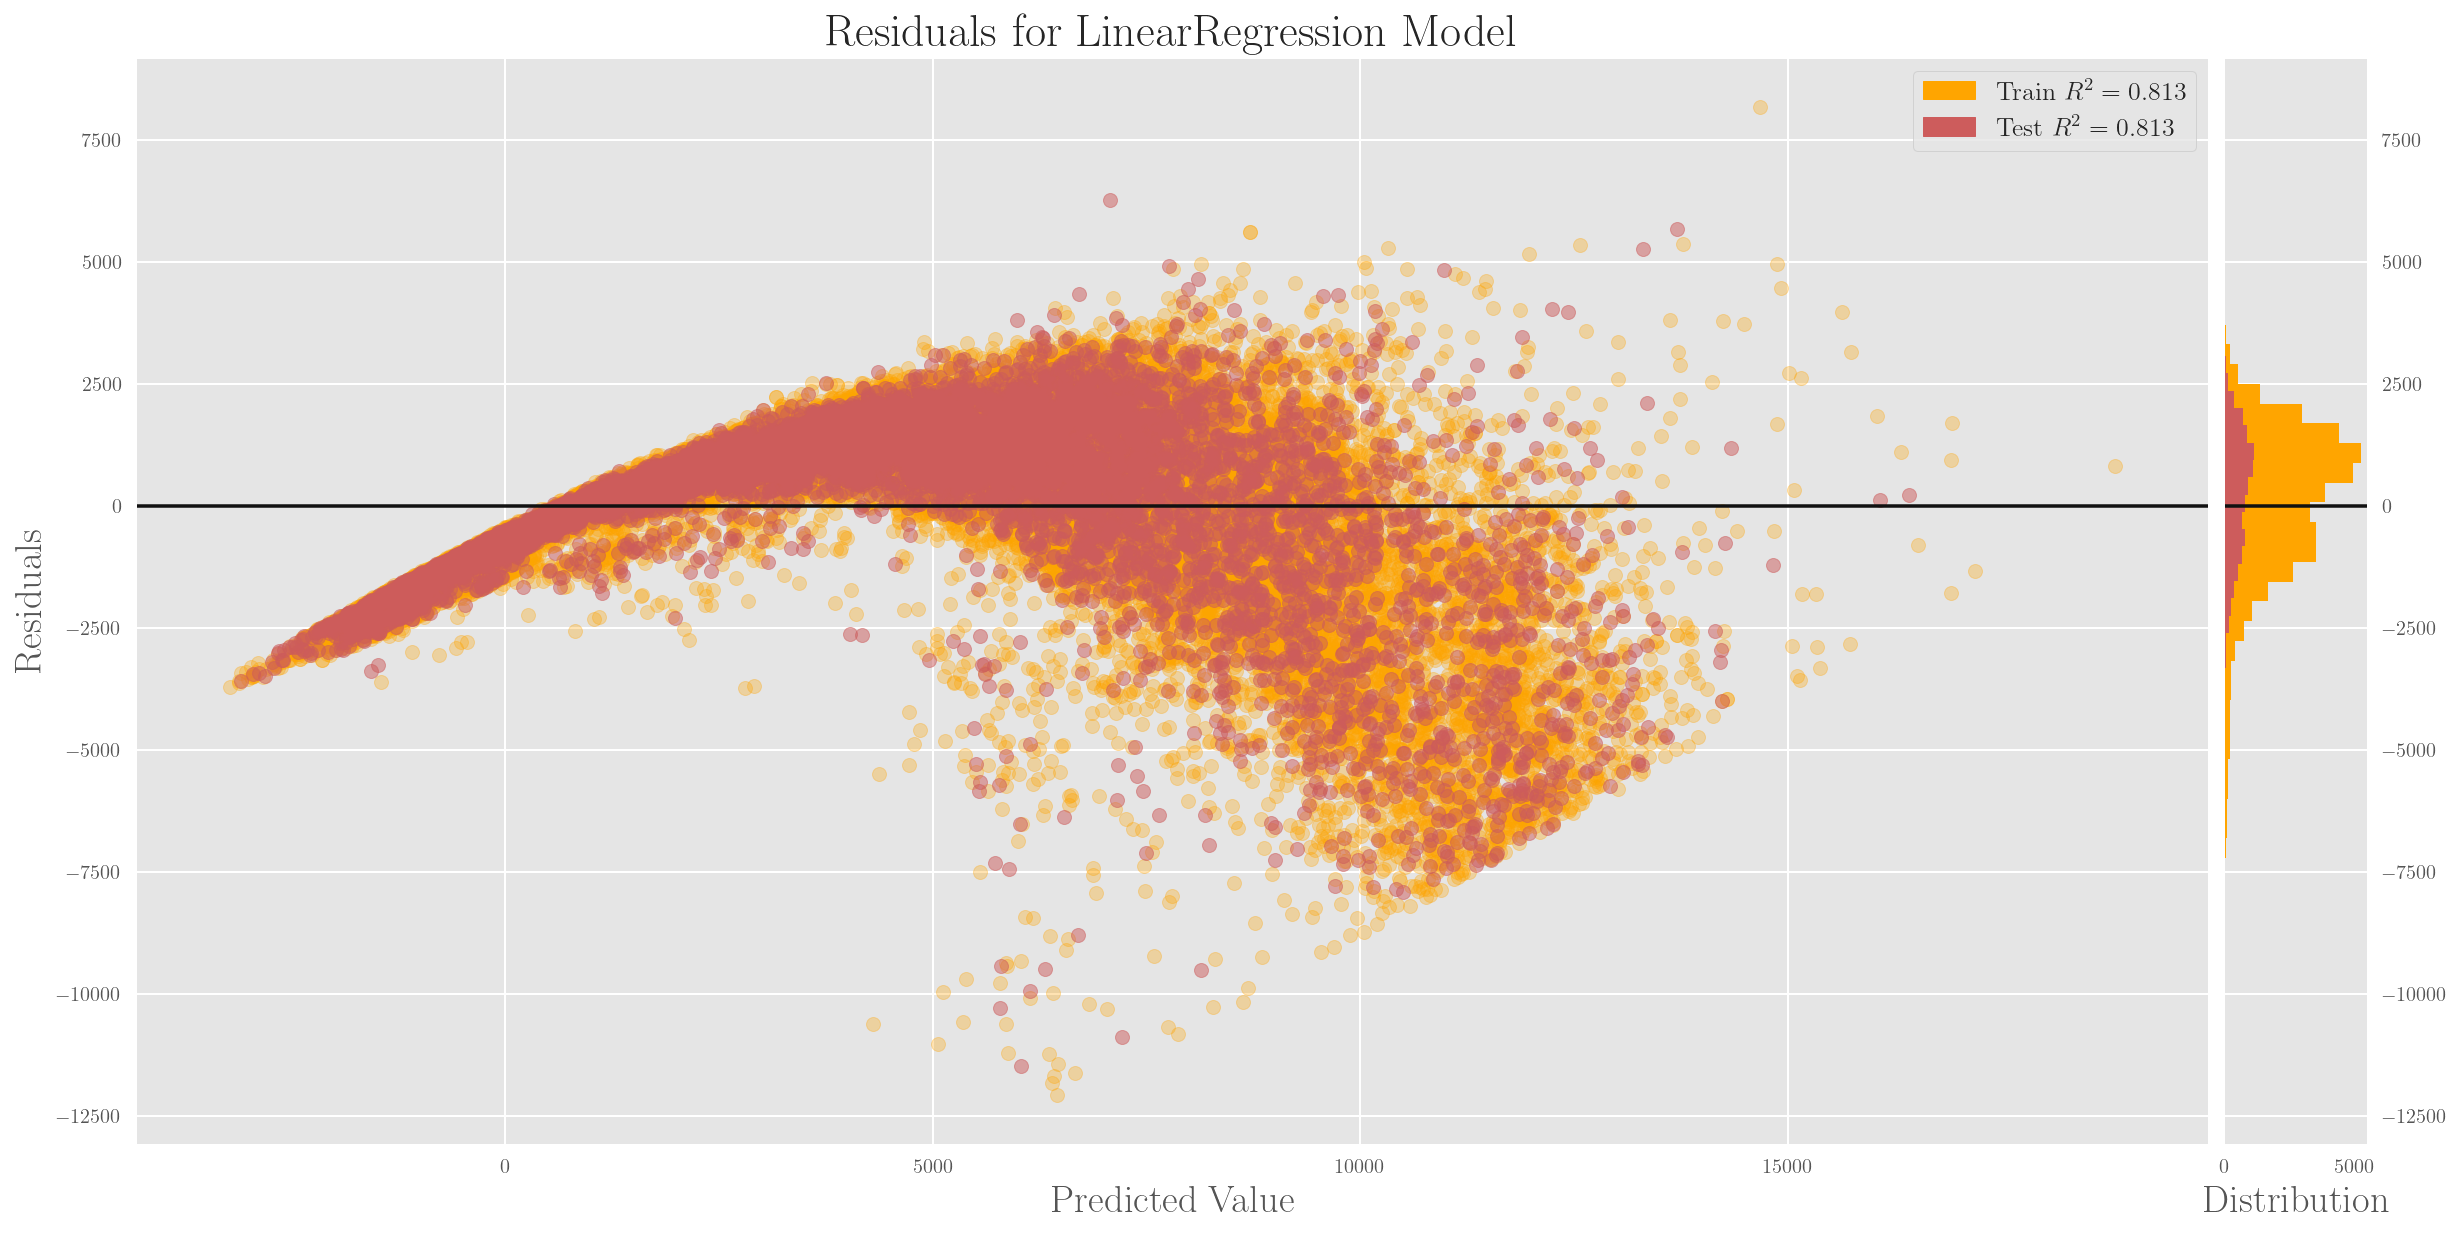

In [31]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(linear_model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

This is a good model and there is a 10% increase than the base model.



In [32]:
degree     = 3
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [[-1.59968799e-13 -2.12952694e+02 -7.83758574e+02  6.03602007e+02
   1.40029564e+02 -1.35466879e+01  5.78888125e+03 -1.33127523e+02
  -3.28482723e+01 -1.38993140e+01  4.97630390e-01 -3.78927448e-01
  -9.12712578e+01 -2.79264441e+02 -7.67683562e+02 -4.79666069e+01
   2.78849365e-01 -1.49865192e+03  3.01366540e+02  1.03541547e+02
   3.19626789e+01  1.57850900e+03 -2.28466896e+01  1.68267374e+01
   1.70462756e+02 -3.26445670e+01 -1.35534584e+02  4.14511921e+03
   1.02096296e+02  7.25730241e+00 -2.40569313e+01 -3.24645890e+00
   2.99776475e+01  7.75211692e+01 -4.64900681e+00  2.16960931e+01
   3.86810321e+01  6.33482952e+01 -3.37638727e+01  1.10926292e+02
   5.21727322e-01  1.64669010e+01 -2.96189025e+01 -2.85887879e+01
  -1.58504684e+01  2.05870515e+01 -2.27628014e+01  5.20647959e+01
   6.15151726e+01  2.53560593e+01 -1.52803679e+02  4.00603348e+01
  -6.04478893e+00 -5.17180589e+02 -6.09620401e+02 -7.60672276e-01
   6.04822115e+01 -1.39496870e+03  5.21398760e+01  5.548700

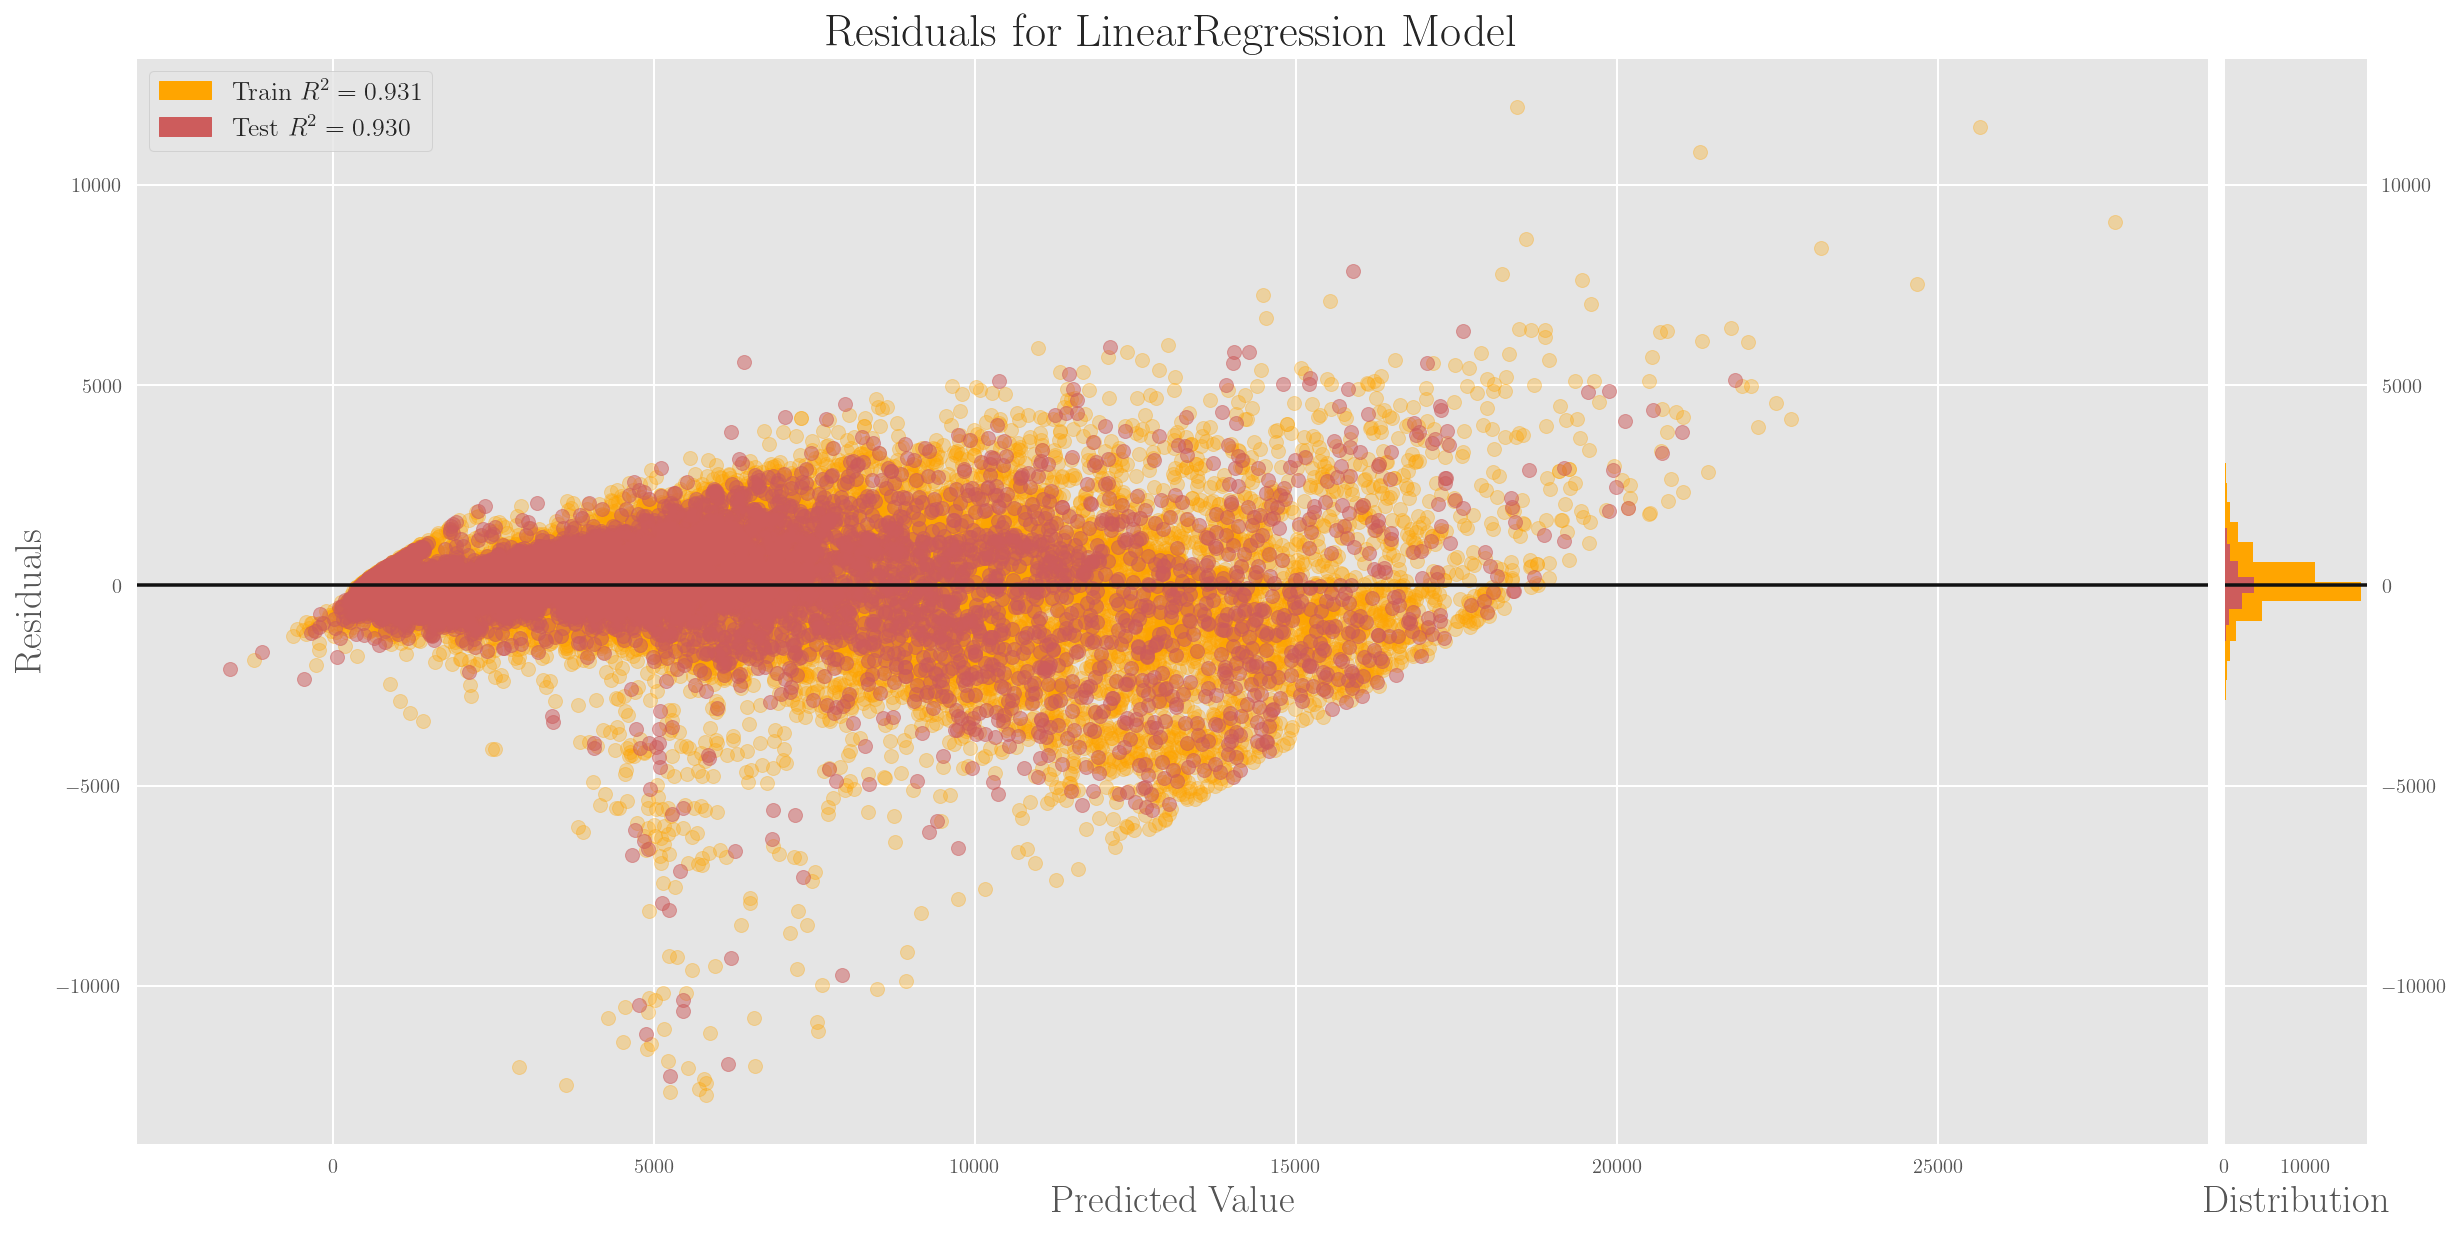

In [33]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

In [34]:
degree     = 4
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [[-7.26569143e-12 -1.84209432e+02 -6.48393750e+02  1.08983666e+03
   1.16456079e+02  1.08482501e+02  5.07900937e+03 -2.94384841e+02
   2.09209041e+01  7.48170355e+01  4.79836317e+01  6.37837730e+01
  -3.03433341e+02 -5.96966469e+02 -1.03226015e+03 -3.69824202e+01
   8.48237652e+01 -2.20374135e+03  2.59103953e+03  7.97594872e+01
  -5.61868570e+01  1.67756974e+03 -8.22213734e+01 -1.76805345e+01
   1.41917821e+02  1.51047246e+01 -2.62038082e+02  5.04531098e+03
   5.88928767e+01  1.11648524e+01  1.09341463e+01  7.20135030e+00
   8.45472468e+00 -8.33692936e+01 -2.52699700e+01 -3.00187424e+01
   4.94151458e+00  1.31233857e+01 -8.81563584e+01  2.03171665e+01
   3.07535710e+01 -1.72218732e-02  6.83836772e+01 -5.50549028e+00
   2.21982646e+01  6.65545121e+01  3.68541478e+01  5.69077617e+00
   1.10146998e+02  1.29345820e+02  8.48255592e+01  2.72789686e+01
   5.00727953e+01 -4.33374238e+02 -5.18893599e+02 -5.19661931e+01
   3.13193556e+01 -1.25724730e+03  3.85406241e+01  2.975489

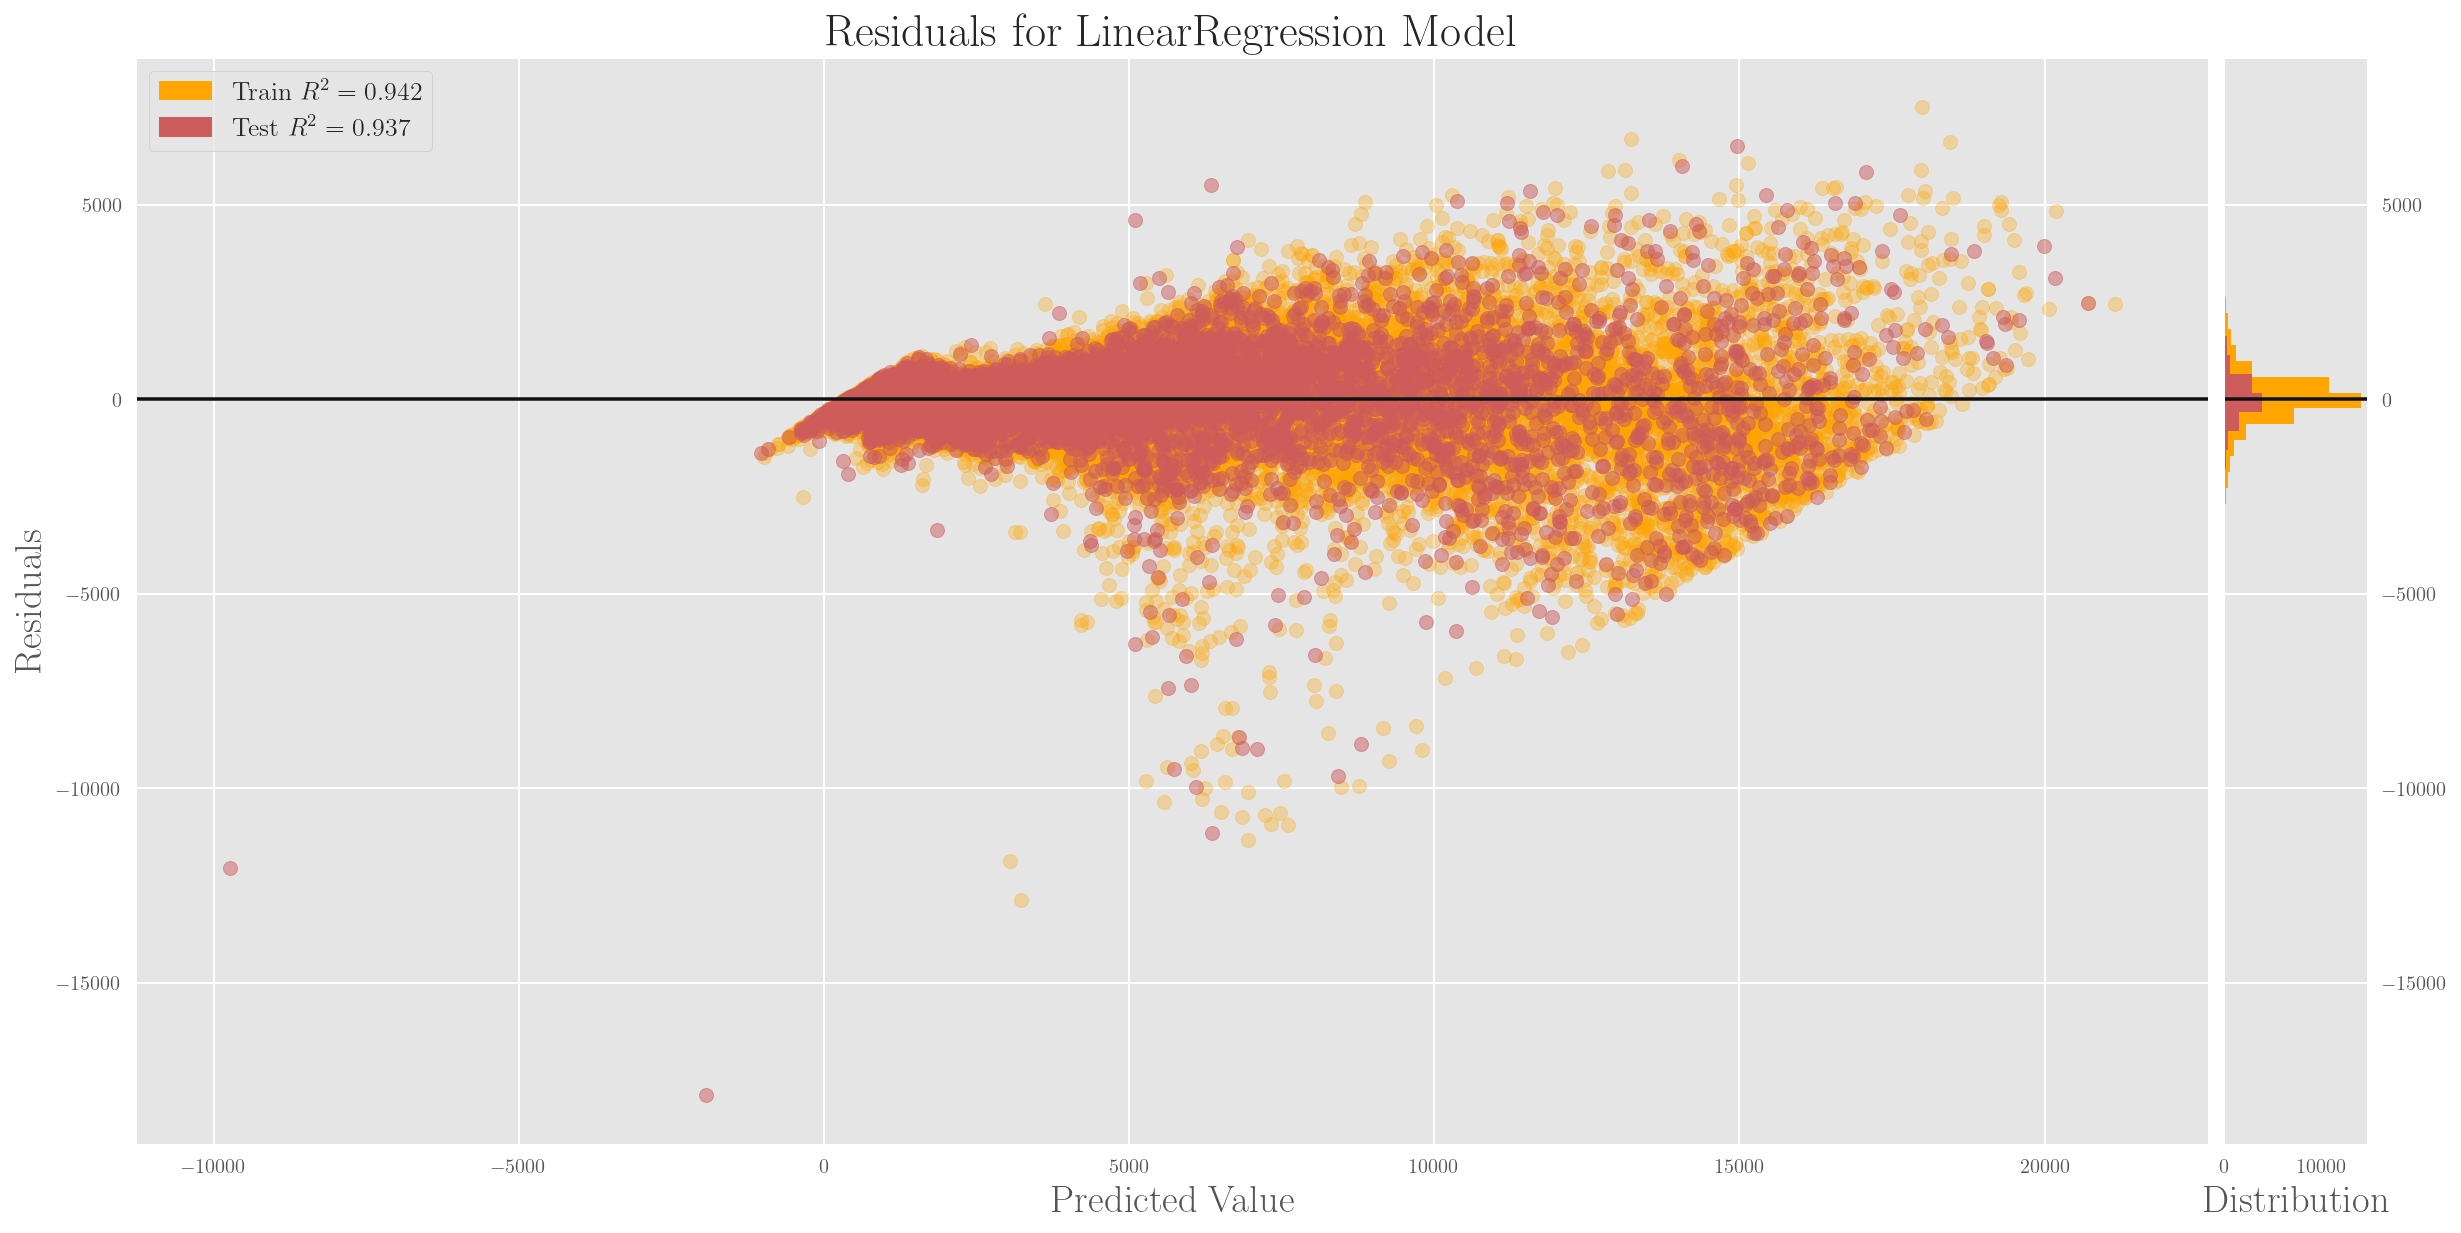

In [35]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)